# 01.ReadData

o objetivo deste Notebook é obter os dados dos datasets

    * consultas_telemedicina 
    * consulas_hospitalares
    * covid - https://covid19-api.vost.pt/swagger.json
através das APIs + Visualização

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import json

from odsclient import get_whole_dataframe

# A) Dataset Covid
* estes são dados cumulativos (o dia X tem os dados acumulados até X-1 mais os do próprio dia)

In [4]:
url_dssg_last_update = 'https://covid19-api.vost.pt/Requests/get_last_update'

In [5]:
response = requests.get(url_dssg_last_update)

In [6]:
print(response.status_code)

200


In [7]:
response.json()

{'data': '11-05-2021',
 'data_dados': '11-05-2021 00:00',
 'confirmados': 840008,
 'confirmados_arsnorte': 337541,
 'confirmados_arscentro': 119083,
 'confirmados_arslvt': 317353,
 'confirmados_arsalentejo': 29880,
 'confirmados_arsalgarve': 21863,
 'confirmados_acores': 4933,
 'confirmados_madeira': 9355,
 'confirmados_estrangeiro': None,
 'confirmados_novos': 268,
 'recuperados': 801306,
 'obitos': 16994,
 'internados': 257.0,
 'internados_uci': 71.0,
 'lab': None,
 'suspeitos': None,
 'vigilancia': 19699.0,
 'n_confirmados': None,
 'cadeias_transmissao': None,
 'transmissao_importada': None,
 'confirmados_0_9_f': 22774.0,
 'confirmados_0_9_m': 23850.0,
 'confirmados_10_19_f': 39146.0,
 'confirmados_10_19_m': 38786.0,
 'confirmados_20_29_f': 63505.0,
 'confirmados_20_29_m': 56513.0,
 'confirmados_30_39_f': 65389.0,
 'confirmados_30_39_m': 55309.0,
 'confirmados_40_49_f': 77623.0,
 'confirmados_40_49_m': 61805.0,
 'confirmados_50_59_f': 69641.0,
 'confirmados_50_59_m': 54807.0,
 'conf

In [8]:
date = "01-04-2021"

In [9]:
url_dssg_get_day = 'https://covid19-api.vost.pt/Requests/get_entry/'+date

In [10]:
#parameters = {"date":'07-04-2021'}
#response = requests.get(url_dssg_get_day, params=parameters)
response = requests.get(url_dssg_get_day)

In [11]:
print(response.status_code)

200


In [12]:
print(response.json())

{'data': {'400': '01-04-2021'}, 'data_dados': {'400': '01-04-2021 00:00'}, 'confirmados': {'400': 822314}, 'confirmados_arsnorte': {'400': 330823}, 'confirmados_arscentro': {'400': 117204}, 'confirmados_arslvt': {'400': 311729}, 'confirmados_arsalentejo': {'400': 29115}, 'confirmados_arsalgarve': {'400': 20739}, 'confirmados_acores': {'400': 4072}, 'confirmados_madeira': {'400': 8632}, 'confirmados_estrangeiro': {'400': None}, 'confirmados_novos': {'400': 592}, 'recuperados': {'400': 778912}, 'obitos': {'400': 16859}, 'internados': {'400': 538.0}, 'internados_uci': {'400': 129.0}, 'lab': {'400': None}, 'suspeitos': {'400': None}, 'vigilancia': {'400': 15950.0}, 'n_confirmados': {'400': None}, 'cadeias_transmissao': {'400': None}, 'transmissao_importada': {'400': None}, 'confirmados_0_9_f': {'400': 22264.0}, 'confirmados_0_9_m': {'400': 23212.0}, 'confirmados_10_19_f': {'400': 38209.0}, 'confirmados_10_19_m': {'400': 37897.0}, 'confirmados_20_29_f': {'400': 62243.0}, 'confirmados_20_29_

In [13]:
# ir buscar o ficheiro .csv ao github ou usar a Api e fazer todo o parsing do json para dataframe...?

In [14]:
columns = list(response.json().keys())
columns

['data',
 'data_dados',
 'confirmados',
 'confirmados_arsnorte',
 'confirmados_arscentro',
 'confirmados_arslvt',
 'confirmados_arsalentejo',
 'confirmados_arsalgarve',
 'confirmados_acores',
 'confirmados_madeira',
 'confirmados_estrangeiro',
 'confirmados_novos',
 'recuperados',
 'obitos',
 'internados',
 'internados_uci',
 'lab',
 'suspeitos',
 'vigilancia',
 'n_confirmados',
 'cadeias_transmissao',
 'transmissao_importada',
 'confirmados_0_9_f',
 'confirmados_0_9_m',
 'confirmados_10_19_f',
 'confirmados_10_19_m',
 'confirmados_20_29_f',
 'confirmados_20_29_m',
 'confirmados_30_39_f',
 'confirmados_30_39_m',
 'confirmados_40_49_f',
 'confirmados_40_49_m',
 'confirmados_50_59_f',
 'confirmados_50_59_m',
 'confirmados_60_69_f',
 'confirmados_60_69_m',
 'confirmados_70_79_f',
 'confirmados_70_79_m',
 'confirmados_80_plus_f',
 'confirmados_80_plus_m',
 'sintomas_tosse',
 'sintomas_febre',
 'sintomas_dificuldade_respiratoria',
 'sintomas_cefaleia',
 'sintomas_dores_musculares',
 'sintom

In [15]:
def getDataFrameFromJSON(obj):
    # create a formatted string of the Python JSON object
    return pd.read_json(json.dumps(obj, sort_keys=False, indent=4))

In [16]:
url_dssg_newest_ds = 'https://covid19-api.vost.pt/Requests/get_full_dataset'

In [17]:
response_ds_covid = requests.get(url_dssg_newest_ds)

In [18]:
df_covid = getDataFrameFromJSON(response_ds_covid.json())

In [19]:
print(f" Dimensão DS : # Dias = {len(df_covid)}, # Colunas = {len(df_covid.columns)}")

 Dimensão DS : # Dias = 441, # Colunas = 93


In [20]:
df_covid.describe()

confirmados  confirmados_arsnorte  confirmados_arscentro  \
count     441.000000            441.000000             441.000000   
mean   287458.600907         123235.489796           37735.002268   
std    321238.620601         132628.977646           46463.604341   
min         0.000000              0.000000               0.000000   
25%     37036.000000          17097.000000            3892.000000   
50%     78247.000000          28094.000000            6354.000000   
75%    595149.000000         270894.000000           81492.000000   
max    840008.000000         337541.000000          119083.000000   

       confirmados_arslvt  confirmados_arsalentejo  confirmados_arsalgarve  \
count          441.000000               441.000000              441.000000   
mean        107308.984127              9029.825397             6665.163265   
std         118951.806279             11702.070350             8164.445895   
min              0.000000                 0.000000                0.000000   
25%          15128.000000               287.000000              399.000000   
50%          39928.000000              1555.000000             1792.000000   
75%         202712.000000             20230.000000            13711.000000   
max         317353.000000             29880.000000            21863.000000   

       confirmados_acores  confirmados_madeira  confirmados_estrangeiro  \
count          441.000000           441.000000                 16.00000   
mean          1356.986395          2126.809524                  9.12500   
std           1663.844320          3182.796368                  5.86373   
min              0.000000             0.000000                  1.00000   
25%            143.000000            90.000000                  5.00000   
50%            282.000000           242.000000                  9.00000   
75%           3116.000000          2994.000000                 11.00000   
max           4933.000000          9355.000000                 21.00000   

       confirmados_novos  ...     obitos_m  confirmados_desconhecidos_m  \
count         441.000000  ...   414.000000                    76.000000   
mean         1904.780045  ...  3178.149758                    27.223684   
std          2948.054248  ...  3269.314550                    14.588213   
min             0.000000  ...    23.000000                     0.000000   
25%           285.000000  ...   804.250000                    15.000000   
50%           541.000000  ...  1084.000000                    21.000000   
75%          2436.000000  ...  6021.000000                    43.000000   
max         16432.000000  ...  8926.000000                    46.000000   

       confirmados_desconhecidos_f         ativos  internados_enfermaria  \
count                    76.000000     436.000000             436.000000   
mean                     20.052632   41529.981651            1268.146789   
std                       9.234565   40372.942020            1413.075071   
min                       0.000000       2.000000               0.000000   
25%                      13.000000   13229.750000             351.750000   
50%                      19.000000   23797.000000             561.500000   
75%                      28.500000   68394.750000            2099.750000   
max                      33.000000  181811.000000            6004.000000   

       confirmados_desconhecidos  incidencia_nacional  incidencia_continente  \
count                 385.000000            58.000000              58.000000   
mean                  434.919481            70.946552              66.084483   
std                  1235.815375             9.443242               6.495580   
min                  -152.000000            53.800000              51.400000   
25%                     0.000000            65.375000              62.600000   
50%                    78.000000            70.000000              66.750000   
75%                   271.000000            72.700000              68.300000   
max    

In [21]:
df_covid['data'].min(), df_covid['data'].max()

('01-01-2021', '31-12-2020')

* Tratar dos valores em falta - substituir "NaN" por 0

In [22]:
print("Valores em falta:", df_covid.isna().sum().sum())

Valores em falta: 10554


In [23]:
#row, col = np.where(df_covid.isna()==True)

In [24]:
#row, col, len(row), len(col)

In [25]:
#df_covid.loc[row, df_covid.columns[col]]

In [26]:
df_covid = df_covid.fillna(0)

In [27]:
print("Valores em falta:", df_covid.isna().sum().sum())

Valores em falta: 0


* Corrigir tipo de dados do df_covid:

In [28]:
format='%Y%m%d'
df_covid['data'] = pd.to_datetime(df_covid['data'] , format='%d-%m-%Y')   # data de publicação
df_covid['data_dados'] = pd.to_datetime(df_covid['data_dados'] , format='%d-%m-%Y %H:%M')  # data e hora de recolha

In [29]:
notIntegerColumns = ['data', 'data_dados', 'sintomas_tosse', 'sintomas_febre', 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia', 'sintomas_dores_musculares',
                     'sintomas_fraqueza_generalizada', 'incidencia_nacional', 'incidencia_continente', 'rt_nacional', 'rt_continente']

In [30]:
dictSchema = {}
for col in df_covid.columns:
    dictSchema[col] = int
    if col in notIntegerColumns:
        if col[:4] != 'data':
            dictSchema[col] = float
        else:
            dictSchema[col] = 'datetime64'

In [31]:
dictSchema

{'data': 'datetime64',
 'data_dados': 'datetime64',
 'confirmados': int,
 'confirmados_arsnorte': int,
 'confirmados_arscentro': int,
 'confirmados_arslvt': int,
 'confirmados_arsalentejo': int,
 'confirmados_arsalgarve': int,
 'confirmados_acores': int,
 'confirmados_madeira': int,
 'confirmados_estrangeiro': int,
 'confirmados_novos': int,
 'recuperados': int,
 'obitos': int,
 'internados': int,
 'internados_uci': int,
 'lab': int,
 'suspeitos': int,
 'vigilancia': int,
 'n_confirmados': int,
 'cadeias_transmissao': int,
 'transmissao_importada': int,
 'confirmados_0_9_f': int,
 'confirmados_0_9_m': int,
 'confirmados_10_19_f': int,
 'confirmados_10_19_m': int,
 'confirmados_20_29_f': int,
 'confirmados_20_29_m': int,
 'confirmados_30_39_f': int,
 'confirmados_30_39_m': int,
 'confirmados_40_49_f': int,
 'confirmados_40_49_m': int,
 'confirmados_50_59_f': int,
 'confirmados_50_59_m': int,
 'confirmados_60_69_f': int,
 'confirmados_60_69_m': int,
 'confirmados_70_79_f': int,
 'confirm

In [32]:
df_covid = df_covid.astype(dictSchema)

In [33]:
df_covid.rename(columns = {'data':'Dia'}, inplace=True)

In [34]:
df_covid.describe()

confirmados  confirmados_arsnorte  confirmados_arscentro  \
count     441.000000            441.000000             441.000000   
mean   287458.600907         123235.489796           37735.002268   
std    321238.620601         132628.977646           46463.604341   
min         0.000000              0.000000               0.000000   
25%     37036.000000          17097.000000            3892.000000   
50%     78247.000000          28094.000000            6354.000000   
75%    595149.000000         270894.000000           81492.000000   
max    840008.000000         337541.000000          119083.000000   

       confirmados_arslvt  confirmados_arsalentejo  confirmados_arsalgarve  \
count          441.000000               441.000000              441.000000   
mean        107308.984127              9029.825397             6665.163265   
std         118951.806279             11702.070350             8164.445895   
min              0.000000                 0.000000                0.000000   
25%          15128.000000               287.000000              399.000000   
50%          39928.000000              1555.000000             1792.000000   
75%         202712.000000             20230.000000            13711.000000   
max         317353.000000             29880.000000            21863.000000   

       confirmados_acores  confirmados_madeira  confirmados_estrangeiro  \
count          441.000000           441.000000               441.000000   
mean          1356.986395          2126.809524                 0.331066   
std           1663.844320          3182.796368                 2.022411   
min              0.000000             0.000000                 0.000000   
25%            143.000000            90.000000                 0.000000   
50%            282.000000           242.000000                 0.000000   
75%           3116.000000          2994.000000                 0.000000   
max           4933.000000          9355.000000                21.000000   

       confirmados_novos  ...     obitos_m  confirmados_desconhecidos_m  \
count         441.000000  ...   441.000000                   441.000000   
mean         1904.780045  ...  2983.569161                     4.691610   
std          2948.054248  ...  3257.975068                    11.925913   
min             0.000000  ...     0.000000                     0.000000   
25%           285.000000  ...   755.000000                     0.000000   
50%           541.000000  ...  1000.000000                     0.000000   
75%          2436.000000  ...  5033.000000                     0.000000   
max         16432.000000  ...  8926.000000                    46.000000   

       confirmados_desconhecidos_f         ativos  internados_enfermaria  \
count                   441.000000     441.000000             441.000000   
mean                      3.455782   41059.120181            1253.768707   
std                       8.486539   40383.525194            1411.438351   
min                       0.000000       0.000000               0.000000   
25%                       0.000000   13146.000000             349.000000   
50%                       0.000000   23775.000000             561.000000   
75%                       0.000000   68307.000000            2077.000000   
max                      33.000000  181811.000000            6004.000000   

       confirmados_desconhecidos  incidencia_nacional  incidencia_continente  \
count                 441.000000           441.000000             441.000000   
mean                  379.691610             9.330839               8.691383   
std                  1163.563881            24.244281              22.481659   
min                  -152.000000             0.000000               0.000000   
25%                     0.000000             0.000000               0.000000   
50%                    64.000000             0.000000               0.000000   
75%                   267.000000             0.000000               0.000000   
max    

In [35]:
df_covid.loc[df_covid['Dia']!=df_covid['data_dados']]

Dia          data_dados  confirmados  confirmados_arsnorte  \
6  2020-03-03 2020-03-03 16:00:00            4                     2   
7  2020-03-04 2020-03-04 17:00:00            6                     3   
8  2020-03-05 2020-03-05 17:00:00            9                     5   
9  2020-03-06 2020-03-06 17:00:00           13                     8   
10 2020-03-07 2020-03-07 17:00:00           21                    15   
11 2020-03-08 2020-03-08 17:30:00           30                    22   
12 2020-03-09 2020-03-09 18:45:00           39                    27   
13 2020-03-10 2020-03-10 10:00:00           41                    27   

    confirmados_arscentro  confirmados_arslvt  confirmados_arsalentejo  \
6                       1                   1                        0   
7                       1                   2                        0   
8                       1                   3                        0   
9                       1                   4                        0   
10                      1                   5                        0   
11                      1                   6                        0   
12                      1                   9                        0   
13                      2                  10                        0   

    confirmados_arsalgarve  confirmados_acores  confirmados_madeira  ...  \
6                        0                   0                    0  ...   
7                        0                   0                    0  ...   
8                        0                   0                    0  ...   
9                        0                   0                    0  ...   
10                       0                   0                    0  ...   
11                       1                   0                    0  ...   
12                       2                   0                    0  ...   
13                       2                   0                    0  ...   

    obitos_m  confirmados_desconhecidos_m  confirmados_desconhecidos_f  \
6          0                            0                            0   
7          0                            0                            0   
8          0                            0                            0   
9          0                            0                            0   
10         0                            0                            0   
11         0                            0                            0   
12         0                            0                            0   
13         0                            0                            0   

    ativos  internados_enfermaria  confirmados_desconhecidos  \
6        4                      0                          4   
7        6                      0                          6   
8        9                      0                          9   
9       13                      0                         13   
10      21                      0                         21   
11      30                      0                         30   
12      39                      0                         39   
13      41                     40                         41   

    incidencia_nacional  incidencia_continente  rt_nacional  rt_continente  
6                   0.0                    0.0          0.0            0.0  
7                   0.0                    0.0          0.0            0.0  
8                   0.0                    0.0          0.0            0.0  
9                   0.0                    0.0          0.0            0.0  
10                  0.0                    0.0          0.0            0.0  
11                  0.0                    0.0          0.0            0.0  
12                  0.0                    0.0          0.0            0.0  
13                  0.0                    0.0          0.0            0.0  

[8 rows x 93 columns]

In [36]:
df_covid.tail()

Dia data_dados  confirmados  confirmados_arsnorte  \
436 2021-05-07 2021-05-07       838852                337103   
437 2021-05-08 2021-05-08       839258                337230   
438 2021-05-09 2021-05-09       839582                337383   
439 2021-05-10 2021-05-10       839740                337453   
440 2021-05-11 2021-05-11       840008                337541   

     confirmados_arscentro  confirmados_arslvt  confirmados_arsalentejo  \
436                 118970              317013                    29832   
437                 119019              317128                    29855   
438                 119040              317235                    29859   
439                 119056              317269                    29868   
440                 119083              317353                    29880   

     confirmados_arsalgarve  confirmados_acores  confirmados_madeira  ...  \
436                   21758                4853                 9323  ...   
437                   21819                4875                 9332  ...   
438                   21840                4891                 9334  ...   
439                   21848                4907                 9339  ...   
440                   21863                4933                 9355  ...   

     obitos_m  confirmados_desconhecidos_m  confirmados_desconhecidos_f  \
436      8923                            0                            0   
437      8925                            0                            0   
438      8926                            0                            0   
439      8926                            0                            0   
440      8926                            0                            0   

     ativos  internados_enfermaria  confirmados_desconhecidos  \
436   22421                    205                        333   
437   22260                    186                        336   
438   22313                    194                        334   
439   22102                    204                        336   
440   21708                    186                        336   

     incidencia_nacional  incidencia_continente  rt_nacional  rt_continente  
436                 57.7                   55.4         0.92           0.92  
437                 57.7                   55.4         0.92           0.92  
438                 57.7                   55.4         0.92           0.92  
439                 53.8                   51.4         0.92           0.91  
440                 53.8                   51.4         0.92           0.91  

[5 rows x 93 columns]

In [37]:
df_covid = df_covid.sort_values(by='Dia').set_index('Dia')

In [38]:
df_covid.index.min(), df_covid.index.max()

(Timestamp('2020-02-26 00:00:00'), Timestamp('2021-05-11 00:00:00'))

In [39]:
df_covid.columns

Index(['data_dados', 'confirmados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
       'sinto

# *óbitos por género

In [40]:
#deaths_gender_columns = ['obitos_f', 'obitos_m', 'obitos', 'recuperados_arsnorte', 'confirmados_novos']
deaths_gender_columns = ['obitos_f', 'obitos_m', 'obitos']

<AxesSubplot:xlabel='Dia'>

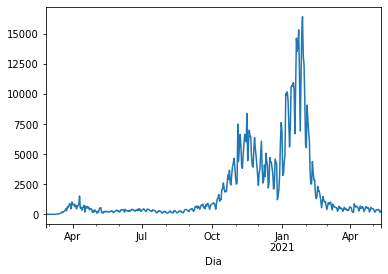

In [41]:
df_covid['confirmados_novos'].plot()

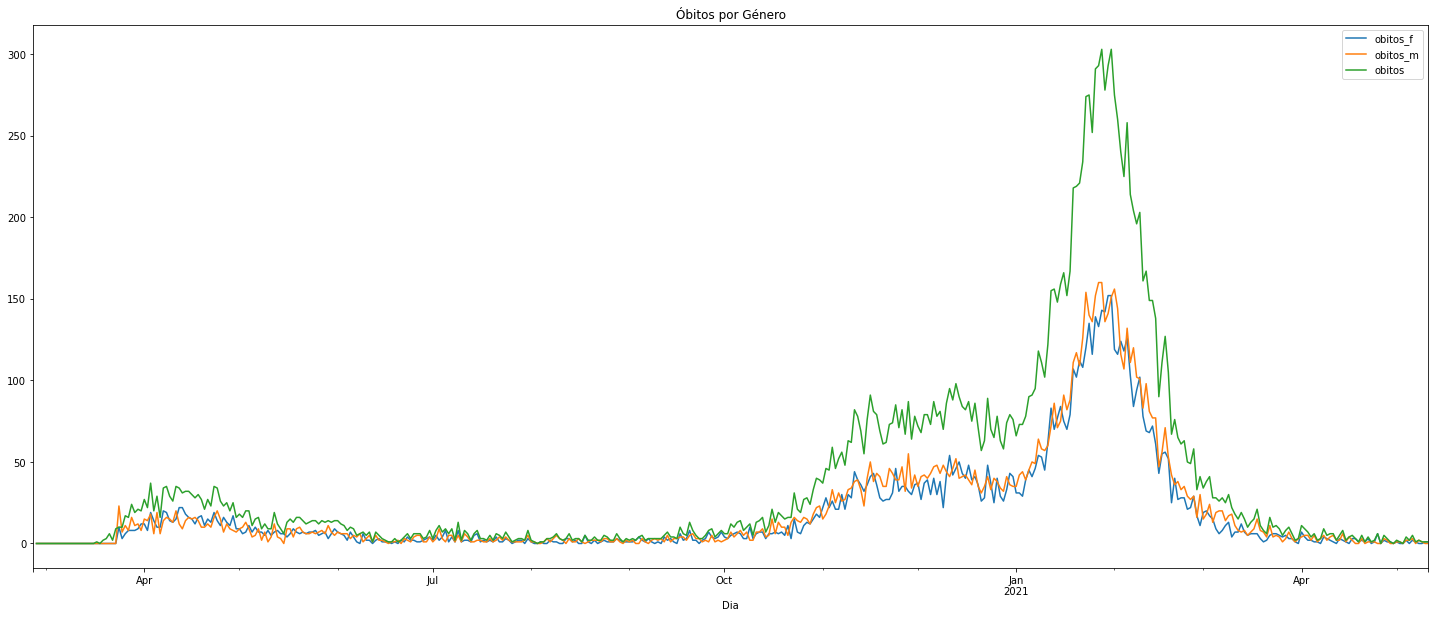

In [42]:
df_covid[deaths_gender_columns].diff().plot(title="Óbitos por Género", figsize=(25,10));

# * existe uma descontinuidade estranha nos obitos por género... validar se a sua soma é igual à dos óbitos

In [43]:
df_covid['soma_obitos_genero'] = df_covid['obitos_f'] + df_covid['obitos_m']

In [44]:
df_covid.loc[df_covid['soma_obitos_genero'] !=  df_covid['obitos']][['soma_obitos_genero', 'obitos']]

soma_obitos_genero  obitos
Dia                                   
2020-03-17                   0       1
2020-03-18                   0       1
2020-03-19                   0       3
2020-03-20                   0       6
2020-03-21                   0      12
2020-03-22                   0      14
2020-03-23                   0      23
2020-06-19                1526    1527

# * esta descontinuidade deve-se ao feriado de 5 de outubro

In [45]:
without_5_oct = [str(dia) for dia in df_covid.index]
without_5_oct.remove('2020-10-05 00:00:00')

In [46]:
deaths_gender_columns.append('soma_obitos_genero')

In [47]:
deaths_gender_columns

['obitos_f', 'obitos_m', 'obitos', 'soma_obitos_genero']

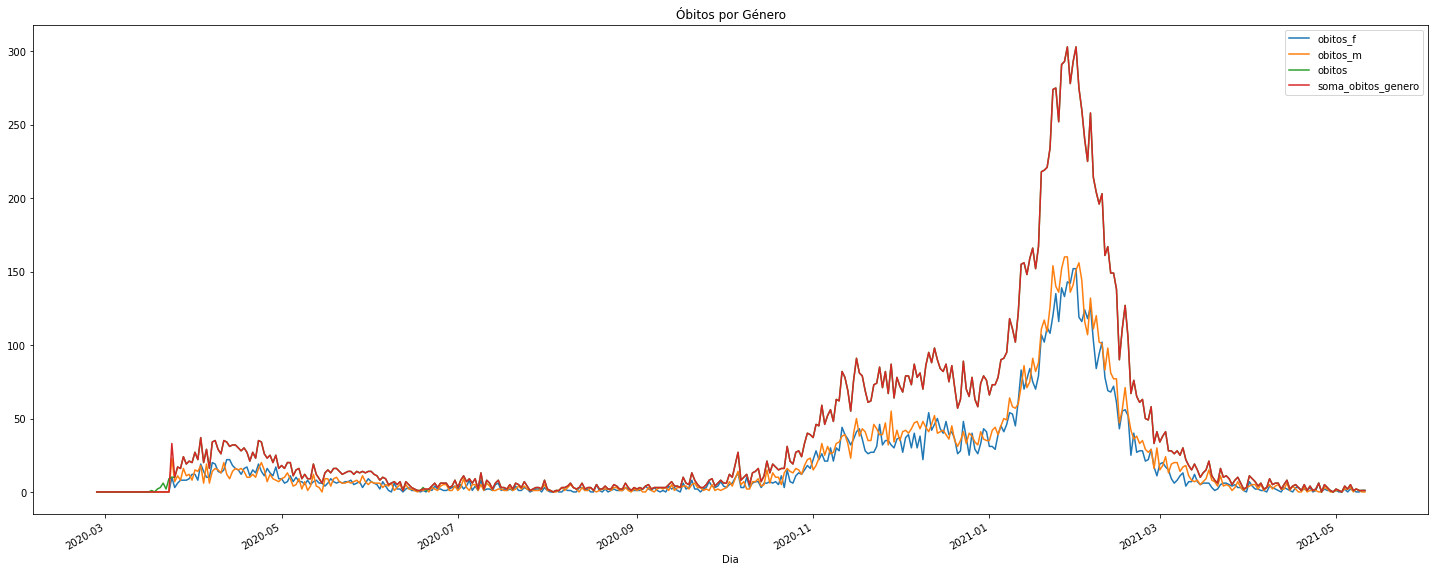

In [48]:
df_covid.loc[without_5_oct, deaths_gender_columns].diff().plot(title="Óbitos por Género", figsize=(25,10));

# * óbitos por região 

In [49]:
deaths_region_columns = []
for col in df_covid.columns:
    if 'obitos' in col and '0' not in col:
        deaths_region_columns.append(col)
        
cols_to_remove = ['obitos', 'obitos_f', 'obitos_m', 'soma_obitos', 'soma_obitos_genero']

for col in cols_to_remove:
    if col in deaths_region_columns:
        deaths_region_columns.remove(col)

In [50]:
deaths_region_columns

['obitos_arsnorte',
 'obitos_arscentro',
 'obitos_arslvt',
 'obitos_arsalentejo',
 'obitos_arsalgarve',
 'obitos_acores',
 'obitos_madeira',
 'obitos_estrangeiro']

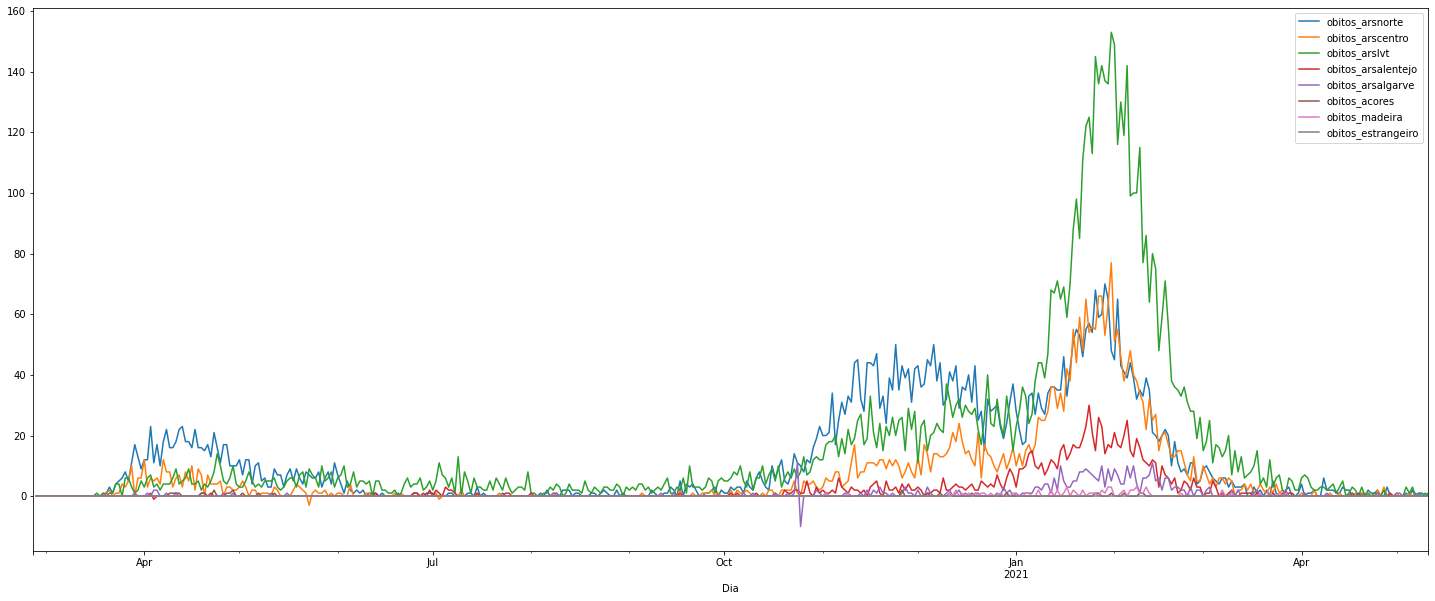

In [51]:
df_covid[deaths_region_columns].diff().plot(title="", figsize=(25,10));

In [52]:
np.sum(df_covid[deaths_region_columns].diff() < 0)

obitos_arsnorte       0
obitos_arscentro      2
obitos_arslvt         0
obitos_arsalentejo    1
obitos_arsalgarve     1
obitos_acores         0
obitos_madeira        0
obitos_estrangeiro    0
dtype: int64

In [53]:
 df_covid['soma_obitos_regiao'] = 0
for col in deaths_region_columns:
    df_covid['soma_obitos_regiao'] += df_covid[col]

In [54]:
 df_covid.loc[df_covid['soma_obitos_regiao'] !=  df_covid['obitos']][['soma_obitos_regiao', 'obitos']]

soma_obitos_regiao  obitos
Dia                                   
2020-10-24                2307    2297

# * sintomas (% de infetados desse dia que teve cada tipo de sintoma)

In [55]:
symptomns_columns = ['sintomas_tosse',
 'sintomas_febre',
 'sintomas_dificuldade_respiratoria',
 'sintomas_cefaleia',
 'sintomas_dores_musculares',
 'sintomas_fraqueza_generalizada']

In [56]:
#df_covid['soma_sintomas'] = 0
#for col in symptomns_columns:
 #   df_covid['soma_sintomas'] += df_covid[col]
#symptomns_columns.append('soma_sintomas')

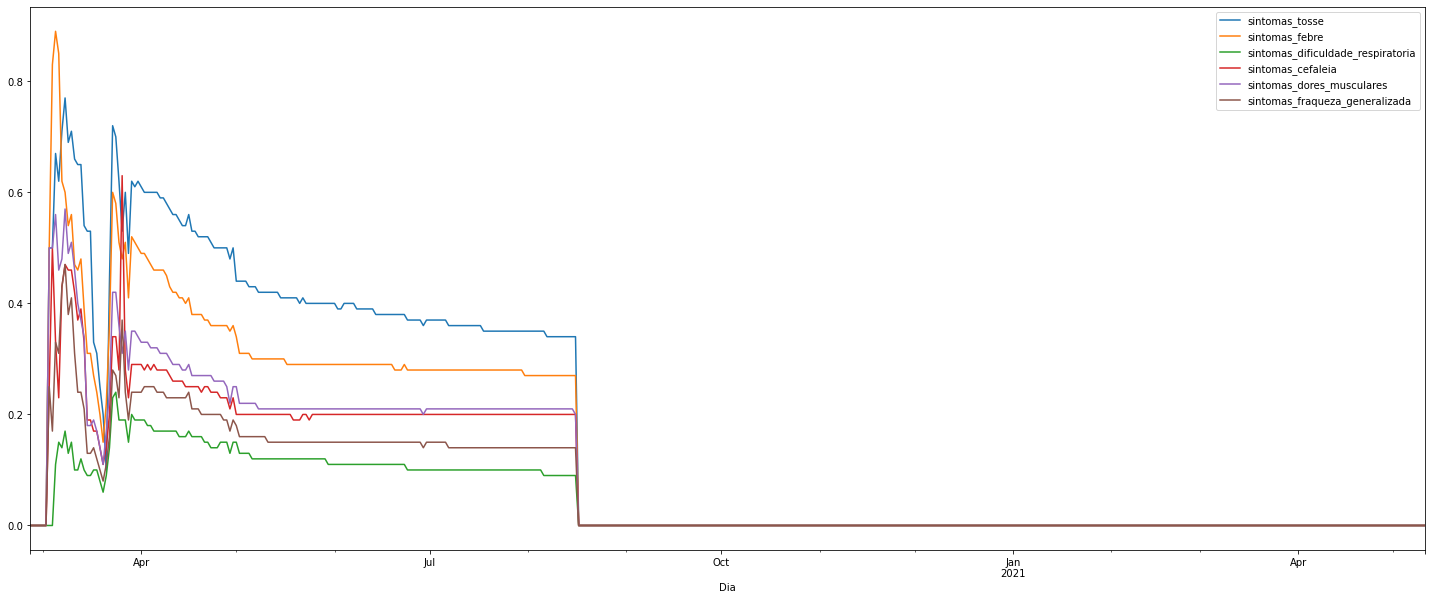

In [57]:
df_covid[symptomns_columns].plot(title="", figsize=(25,10));

# * Confirmados

In [58]:
confirmed_female_columns = ['confirmados_0_9_f',
 'confirmados_10_19_f',
 'confirmados_20_29_f',
 'confirmados_30_39_f',
 'confirmados_40_49_f',
 'confirmados_50_59_f',
 'confirmados_60_69_f',
 'confirmados_70_79_f',
 'confirmados_80_plus_f']

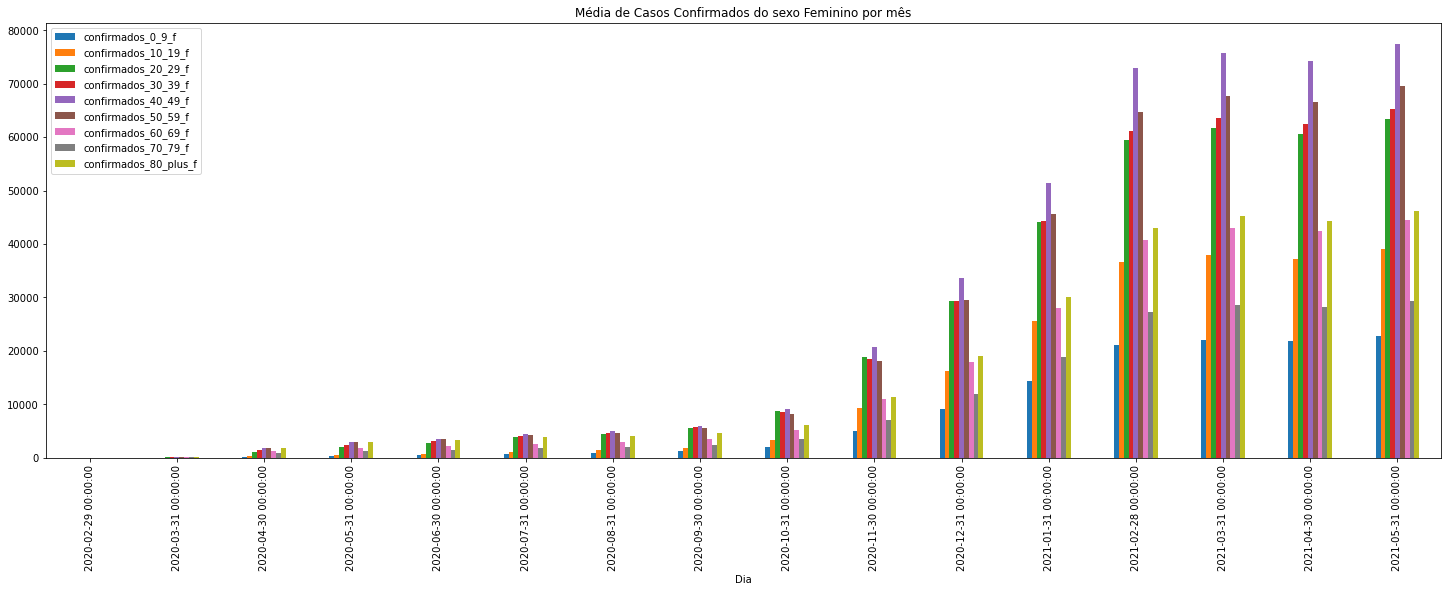

In [59]:
df_covid[confirmed_female_columns].resample("M").mean().plot(title="Média de Casos Confirmados do sexo Feminino por mês", kind='bar', figsize=(25,8));

In [60]:
from datetime import datetime

In [61]:
after_15_march = [str(dia) for dia in df_covid.index if dia > datetime.strptime('2021-03-15', '%Y-%m-%d')]

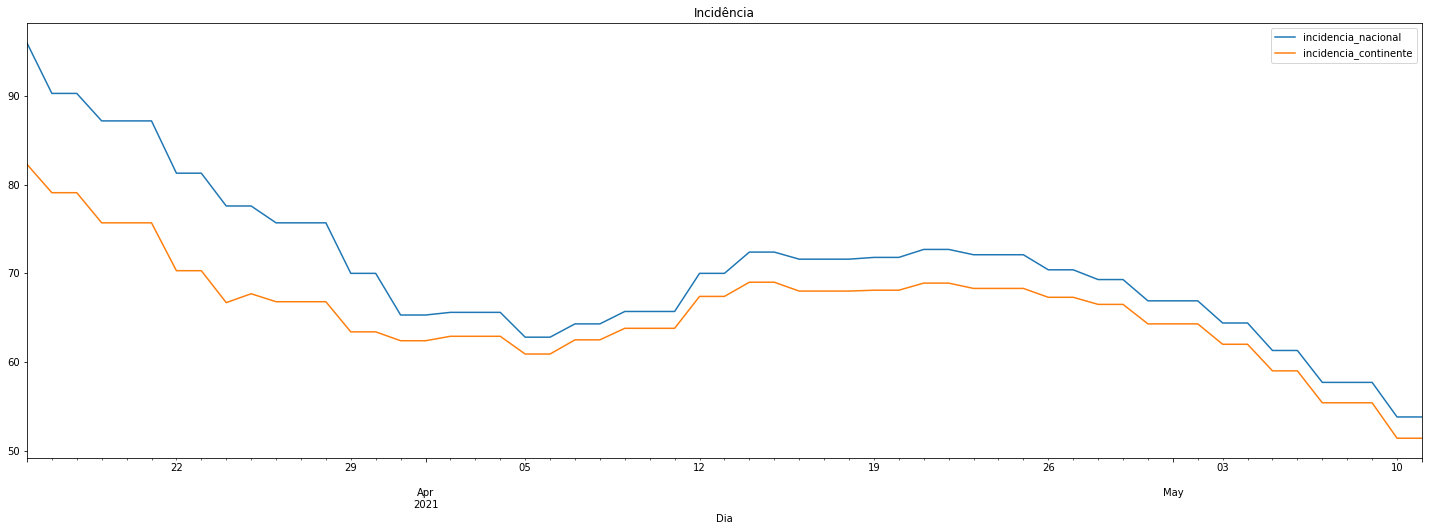

In [62]:
incidencia_columns = ['incidencia_nacional', 'incidencia_continente']
df_covid.loc[after_15_march, incidencia_columns].plot(title="Incidência", figsize=(25,8));

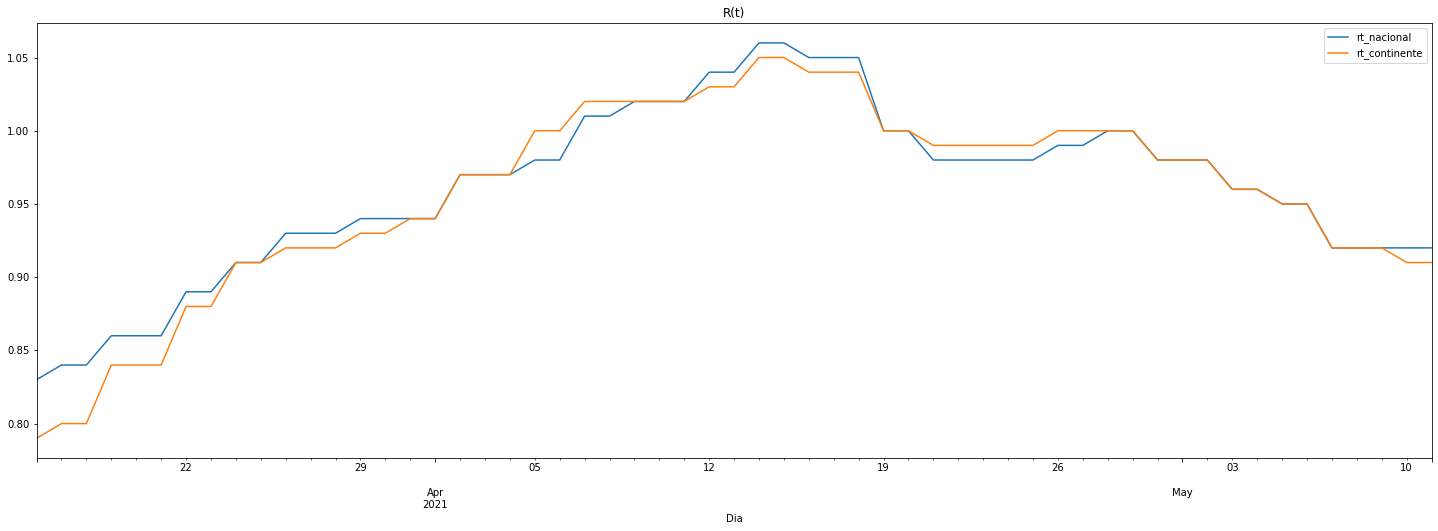

In [63]:
transmissao_columns = ['rt_nacional', 'rt_continente']
df_covid.loc[after_15_march, transmissao_columns].plot(title="R(t)", figsize=(25,8));

# B) Dataset "Consultas Médicas Hospitalares"

In [64]:
#!pip install odsclient[full]

In [65]:
datasetHospId = "01_sica_evolucao-mensal-das-consultas-medicas-hospitalares"

In [66]:
%matplotlib inline

In [67]:
df_hosp = get_whole_dataframe(datasetHospId, base_url="https://transparencia.sns.gov.pt/", tqdm=True)

https://transparencia.sns.gov.pt/explore/dataset/01_sica_evolucao-mensal-das-consultas-medicas-hospitalares/download/: 0.00B [00:03, ?B/s]


In [68]:
df_hosp.head()

Período Periodo_format_2                       Região  \
0  2018-11       2018/11/01        Região de Saúde Norte   
1  2018-12       2018/12/01  Região de Saúde do Alentejo   
2  2018-12       2018/12/01    Região de Saúde do Centro   
3  2018-12       2018/12/01    Região de Saúde do Centro   
4  2018-12       2018/12/01          Região de Saúde LVT   

                                         Instituição Localização Geográfica  \
0          Unidade Local de Saúde de Matosinhos, EPE  41.1794456,-8.6745115   
1    Unidade Local de Saúde do Norte Alentejano, EPE  39.3003425,-7.4263845   
2  Centro Hospitalar Universitário Cova da Beira,...  40.2804158,-7.4922407   
3         Hospital Distrital da Figueira da Foz, EPE   40.117897,-8.8586755   
4  Centro Hospitalar Universitário Lisboa Central...  38.7166948,-9.1371248   

   Nº Consultas Médicas Total  Nº Primeiras Consultas  \
0                      265575                   76981   
1                      100375                   28114   
2                      148747                   50090   
3                       91270                   32938   
4                      725004                  189989   

   Nº Consultas Subsequentes  
0                     188594  
1                      72261  
2                      98657  
3                      58332  
4                     535015

In [69]:
df_hosp.describe()

Nº Consultas Médicas Total  Nº Primeiras Consultas  \
count                 4875.000000             4875.000000   
mean                129529.447179            36934.083487   
std                 141647.988411            37749.137617   
min                    232.000000               95.000000   
25%                  36195.500000            10241.500000   
50%                  81665.000000            24736.000000   
75%                 172067.000000            50343.000000   
max                 912095.000000           227493.000000   

       Nº Consultas Subsequentes  
count                4875.000000  
mean                92595.363692  
std                104764.061535  
min                   137.000000  
25%                 25288.000000  
50%                 56849.000000  
75%                121562.000000  
max                698196.000000

In [70]:
len(df_hosp)/len(df_hosp['Período'].unique())

49.24242424242424

In [71]:
print(f" Dataset com {len(df_hosp['Região'].unique())} Regiões distintas:\n")
count = 1
for reg in df_hosp['Região'].unique():
    print(f"\t{count}º Região '{reg}'")
    count+=1

 Dataset com 5 Regiões distintas:

	1º Região 'Região de Saúde Norte'
	2º Região 'Região de Saúde do Alentejo'
	3º Região 'Região de Saúde do Centro'
	4º Região 'Região de Saúde LVT'
	5º Região 'Região de Saúde do Algarve'


In [72]:
print(f" Dataset com {len(df_hosp['Instituição'].unique())} Instituições distintas...")

 Dataset com 52 Instituições distintas...


# * número de instituições por região

In [73]:
df_hosp[['Região', 'Instituição']].groupby('Região').nunique()

Instituição
Região                                  
Região de Saúde LVT                   16
Região de Saúde Norte                 18
Região de Saúde do Alentejo            4
Região de Saúde do Algarve             1
Região de Saúde do Centro             13

In [74]:
df_hosp.loc[df_hosp['Região'] == 'Região de Saúde do Algarve', 'Instituição'].unique()

array(['Centro Hospitalar Universitário do Algarve,EPE'], dtype=object)

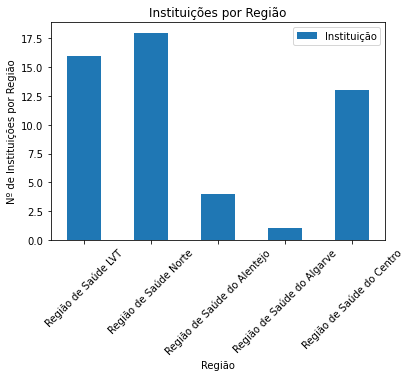

In [75]:
xlabels = df_hosp[['Região', 'Instituição']].groupby('Região').nunique().index
ax = df_hosp[['Região', 'Instituição']].groupby('Região').nunique().plot(kind='bar')
ax.set_xticklabels(xlabels, rotation=45);
ax.set_ylabel('Nº de Instituições por Região');
ax.set_title('Instituições por Região');

In [76]:
df_hosp['Período'] = pd.to_datetime(df_hosp['Período'] , format='%Y-%m')   # mês
df_hosp['Periodo_format_2'] = pd.to_datetime(df_hosp['Periodo_format_2'] , format='%Y/%m/%d')   # dia
df_hosp.rename(columns = {'Periodo_format_2':'Dia'}, inplace=True)

In [77]:
df_hosp.loc[df_hosp['Período']!=df_hosp['Dia']]

Empty DataFrame
Columns: [Período, Dia, Região, Instituição, Localização Geográfica, Nº Consultas Médicas Total, Nº Primeiras Consultas, Nº Consultas Subsequentes]
Index: []

In [78]:
print(f" Dataset com dados de {df_hosp['Dia'].min()} a {df_hosp['Dia'].max()} ...")

 Dataset com dados de 2013-01-01 00:00:00 a 2021-03-01 00:00:00 ...


In [79]:
# heat map - consultas por região e por "Ano-mês"
df_hosp.groupby(['Região', 'Dia']).sum()

Nº Consultas Médicas Total  \
Região                    Dia                                      
Região de Saúde LVT       2013-01-01                      383984   
                          2013-02-01                      725954   
                          2013-03-01                     1062755   
                          2013-04-01                     1433688   
                          2013-05-01                     1828824   
...                                                          ...   
Região de Saúde do Centro 2020-11-01                     1865984   
                          2020-12-01                     2018946   
                          2021-01-01                      171966   
                          2021-02-01                      333349   
                          2021-03-01                      545110   

                                      Nº Primeiras Consultas  \
Região                    Dia                                  
Região de Saúde LVT       2013-01-01                  107282   
                          2013-02-01                  206746   
                          2013-03-01                  301862   
                          2013-04-01                  405973   
                          2013-05-01                  517978   
...                                                      ...   
Região de Saúde do Centro 2020-11-01                  496523   
                          2020-12-01                  540010   
                          2021-01-01                   45446   
                          2021-02-01                   88277   
                          2021-03-01                  149953   

                                      Nº Consultas Subsequentes  
Região                    Dia                                    
Região de Saúde LVT       2013-01-01                     276702  
                          2013-02-01                     519208  
                          2013-03-01                     760893  
                          2013-04-01                    1027715  
                          2013-05-01                    1310846  
...                                                         ...  
Região de Saúde do Centro 2020-11-01                    1369461  
                          2020-12-01                    1478936  
                          2021-01-01                     126520  
                          2021-02-01                     245072  
                          2021-03-01                     395157  

[495 rows x 3 columns]

In [81]:
df_hosp.groupby('Região').count()

Período   Dia  Instituição  \
Região                                                    
Região de Saúde LVT             1584  1584         1584   
Região de Saúde Norte           1584  1584         1584   
Região de Saúde do Alentejo      396   396          396   
Região de Saúde do Algarve        99    99           99   
Região de Saúde do Centro       1212  1212         1212   

                             Localização Geográfica  \
Região                                                
Região de Saúde LVT                            1584   
Região de Saúde Norte                          1584   
Região de Saúde do Alentejo                     396   
Região de Saúde do Algarve                       99   
Região de Saúde do Centro                      1212   

                             Nº Consultas Médicas Total  \
Região                                                    
Região de Saúde LVT                                1584   
Região de Saúde Norte                              1584   
Região de Saúde do Alentejo                         396   
Região de Saúde do Algarve                           99   
Região de Saúde do Centro                          1212   

                             Nº Primeiras Consultas  Nº Consultas Subsequentes  
Região                                                                          
Região de Saúde LVT                            1584                       1584  
Região de Saúde Norte                          1584                       1584  
Região de Saúde do Alentejo                     396                        396  
Região de Saúde do Algarve                       99                         99  
Região de Saúde do Centro                      1212                       1212

In [82]:
# heat map - consultas por região e por "Ano-mês", cruzar com os casos de covid confirmados !!! (apenas para os meses em que ha dados em comum....)

In [83]:
# que insituticoes têm mais consultas médicas realizadas? que região? essas regioes são as que registam menos casos confirmados?
# (cruzar os dois datasets)

# * validar se o número de consultas totais é a soma das "primeiras consultas" com as "consultas subsequentes"

In [84]:
len(df_hosp.loc[df_hosp['Nº Consultas Médicas Total'] != (df_hosp['Nº Primeiras Consultas'] + df_hosp['Nº Consultas Subsequentes'])])

0

In [85]:
pivot_appointments = pd.pivot_table(df_hosp, values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

In [86]:
pivot_first_appointment = pd.pivot_table(df_hosp, values = 'Nº Primeiras Consultas', index = ['Região'], columns = ['Dia'])

In [87]:
pivot_subseq_appointment = pd.pivot_table(df_hosp, values = 'Nº Consultas Subsequentes', index = ['Região'], columns = ['Dia'])

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2 heatmaps - um antes da pandemia começar e outro depois:

In [89]:
covid_start_date = '2020-01-01'

In [90]:
# before covid
df_hosp.loc[df_hosp['Dia']<covid_start_date]['Dia'].max(), len(df_hosp.loc[df_hosp['Dia']<covid_start_date])

(Timestamp('2019-12-01 00:00:00'), 4140)

In [91]:
before_covid_days = df_hosp.loc[df_hosp['Dia']<covid_start_date].index
after_covid_days = df_hosp.loc[df_hosp['Dia']>=covid_start_date].index

In [92]:
df_hosp.loc[before_covid_days]['Dia'].max(), df_hosp.loc[after_covid_days]['Dia'].min()

(Timestamp('2019-12-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [93]:
# after covid started
df_hosp.loc[df_hosp['Dia']>=covid_start_date]['Dia'].max(), len(df_hosp.loc[df_hosp['Dia']>=covid_start_date])

(Timestamp('2021-03-01 00:00:00'), 735)

In [94]:
pivot_appointments_bf = pd.pivot_table(df_hosp.loc[before_covid_days], values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

In [95]:
pivot_appointments_bf.index

Index(['Região de Saúde LVT', 'Região de Saúde Norte',
       'Região de Saúde do Alentejo', 'Região de Saúde do Algarve',
       'Região de Saúde do Centro'],
      dtype='object', name='Região')

In [96]:
monthDict = {'1':'Jan',
'2':'Feb',
'3':'Mar',
'4':'Apr',
'5':'May',
'6':'Jun',
'7':'Jul',
'8':'Aug',
'9':'Sept',
'10':'Oct',
'11':'Nov',
'12':'Dec'}

In [97]:
len(xlabels), len(pivot_appointments_bf.columns)

(5, 84)

In [98]:
def getMonthLabels(pivot, monthDict):
    xlabels = []
    for month in pivot.columns:
        if month.month % 2 == 0:
            #print(f" Mês {month.month} de {month.year} - {month} . ")
            xlabels.append('{}-{}'.format(monthDict[str(month.month)], month.year))
        else:
            xlabels.append('') 
    return xlabels

In [151]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap = 'tab20c'
cmap = 'flare'
cmap = sns.color_palette('RdBu_r', 20)
#cmap = 'gist_ncar'

# usar outro COLOR MAP!!

In [156]:
df_hosp

Período        Dia                       Região  \
0    2018-11-01 2018-11-01        Região de Saúde Norte   
1    2018-12-01 2018-12-01  Região de Saúde do Alentejo   
2    2018-12-01 2018-12-01    Região de Saúde do Centro   
3    2018-12-01 2018-12-01    Região de Saúde do Centro   
4    2018-12-01 2018-12-01          Região de Saúde LVT   
...         ...        ...                          ...   
4870 2021-03-01 2021-03-01        Região de Saúde Norte   
4871 2021-03-01 2021-03-01        Região de Saúde Norte   
4872 2021-03-01 2021-03-01        Região de Saúde Norte   
4873 2021-03-01 2021-03-01        Região de Saúde Norte   
4874 2021-03-01 2021-03-01        Região de Saúde Norte   

                                            Instituição  \
0             Unidade Local de Saúde de Matosinhos, EPE   
1       Unidade Local de Saúde do Norte Alentejano, EPE   
2     Centro Hospitalar Universitário Cova da Beira,...   
3            Hospital Distrital da Figueira da Foz, EPE   
4     Centro Hospitalar Universitário Lisboa Central...   
...                                                 ...   
4870         Centro Hospitalar Entre Douro e Vouga, EPE   
4871  Centro Hospitalar Póvoa de Varzim/Vila do Cond...   
4872                    Hospital Santa Maria Maior, EPE   
4873          Unidade Local de Saúde do Alto Minho, EPE   
4874            Unidade Local de Saúde do Nordeste, EPE   

     Localização Geográfica  Nº Consultas Médicas Total  \
0     41.1794456,-8.6745115                      265575   
1     39.3003425,-7.4263845                      100375   
2     40.2804158,-7.4922407                      148747   
3      40.117897,-8.8586755                       91270   
4     38.7166948,-9.1371248                      725004   
...                     ...                         ...   
4870  40.9293884,-8.5458794                       74811   
4871  41.3828711,-8.7589945                       25241   
4872  41.5324234,-8.6171561                       19198   
4873  41.7056054,-8.8252713                       58813   
4874  41.8056532,-6.7888197                       23000   

      Nº Primeiras Consultas  Nº Consultas Subsequentes  
0                      76981                     188594  
1                      28114                      72261  
2                      50090                      98657  
3                      32938                      58332  
4                     189989                     535015  
...                      ...                        ...  
4870                   20700                      54111  
4871                    9193                      16048  
4872                    7287                      11911  
4873                   16768                      42045  
4874                    9191                      13809  

[4875 rows x 8 columns]

In [176]:
df_hosp_new_idx = df_hosp.set_index(['Instituição', 'Dia'], drop = False)
df_hosp_new_idx

Período  \
Instituição                                        Dia                     
Unidade Local de Saúde de Matosinhos, EPE          2018-11-01 2018-11-01   
Unidade Local de Saúde do Norte Alentejano, EPE    2018-12-01 2018-12-01   
Centro Hospitalar Universitário Cova da Beira, EPE 2018-12-01 2018-12-01   
Hospital Distrital da Figueira da Foz, EPE         2018-12-01 2018-12-01   
Centro Hospitalar Universitário Lisboa Central,... 2018-12-01 2018-12-01   
...                                                                  ...   
Centro Hospitalar Entre Douro e Vouga, EPE         2021-03-01 2021-03-01   
Centro Hospitalar Póvoa de Varzim/Vila do Conde... 2021-03-01 2021-03-01   
Hospital Santa Maria Maior, EPE                    2021-03-01 2021-03-01   
Unidade Local de Saúde do Alto Minho, EPE          2021-03-01 2021-03-01   
Unidade Local de Saúde do Nordeste, EPE            2021-03-01 2021-03-01   

                                                                     Dia  \
Instituição                                        Dia                     
Unidade Local de Saúde de Matosinhos, EPE          2018-11-01 2018-11-01   
Unidade Local de Saúde do Norte Alentejano, EPE    2018-12-01 2018-12-01   
Centro Hospitalar Universitário Cova da Beira, EPE 2018-12-01 2018-12-01   
Hospital Distrital da Figueira da Foz, EPE         2018-12-01 2018-12-01   
Centro Hospitalar Universitário Lisboa Central,... 2018-12-01 2018-12-01   
...                                                                  ...   
Centro Hospitalar Entre Douro e Vouga, EPE         2021-03-01 2021-03-01   
Centro Hospitalar Póvoa de Varzim/Vila do Conde... 2021-03-01 2021-03-01   
Hospital Santa Maria Maior, EPE                    2021-03-01 2021-03-01   
Unidade Local de Saúde do Alto Minho, EPE          2021-03-01 2021-03-01   
Unidade Local de Saúde do Nordeste, EPE            2021-03-01 2021-03-01   

                                                                                    Região  \
Instituição                                        Dia                                       
Unidade Local de Saúde de Matosinhos, EPE          2018-11-01        Região de Saúde Norte   
Unidade Local de Saúde do Norte Alentejano, EPE    2018-12-01  Região de Saúde do Alentejo   
Centro Hospitalar Universitário Cova da Beira, EPE 2018-12-01    Região de Saúde do Centro   
Hospital Distrital da Figueira da Foz, EPE         2018-12-01    Região de Saúde do Centro   
Centro Hospitalar Universitário Lisboa Central,... 2018-12-01          Região de Saúde LVT   
...                                                                                    ...   
Centro Hospitalar Entre Douro e Vouga, EPE         2021-03-01        Região de Saúde Norte   
Centro Hospitalar Póvoa de Varzim/Vila do Conde... 2021-03-01        Região de Saúde Norte   
Hospital Santa Maria Maior, EPE                    2021-03-01        Região de Saúde Norte   
Unidade Local de Saúde do Alto Minho, EPE          2021-03-01        Região de Saúde Norte   
Unidade Local de Saúde do Nordeste, EPE            2021-03-01        Região de Saúde Norte   

                                                                                                     Instituição  \
Instituição                                        Dia                                                             
Unidade Local de Saúde de Matosinhos, EPE          2018-11-01          Unidade Local de Saúde de Matosinhos, EPE   
Unidade Local de Saúde do Norte Alentejano, EPE    2018-12-01    Unidade Local de Saúde do Norte Alentejano, EPE   
Centro Hospitalar Universitário Cova da Beira, EPE 2018-12-01  Centro Hospitalar Universitário Cova da Beira,...   
Hospital Distrital da Figueira da Foz, EPE         2018-12-01         Hospital Distrital da Figueira da Foz, EPE   
Centro Hospitalar Universitário Lisboa Central,... 2018-12-01  Centro Hospitalar Universitário Lisboa Central...   
...                                                 

In [188]:
s = df_hosp_new_idx.loc['Centro Hospitalar Entre Douro e Vouga, EPE', 'Nº Consultas Médicas Total'].sort_index().diff()

<AxesSubplot:xlabel='Dia'>

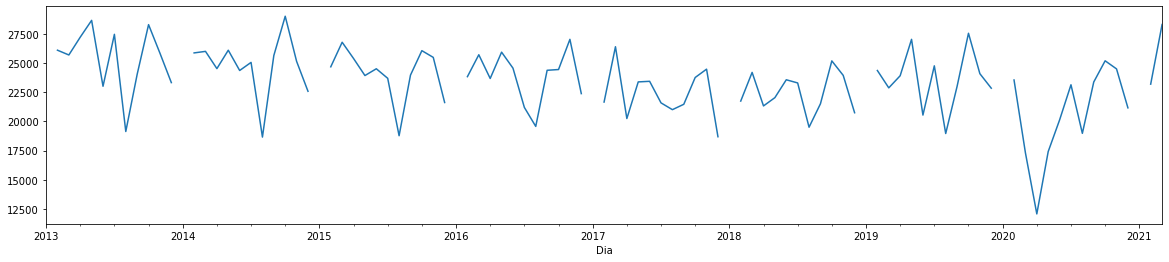

In [191]:
s.where(s>1).plot(figsize = (20,4))

In [212]:
x = pivot_appointments.T.diff()
x = x.where(x>1).T
x = x.iloc[:, 60:]
x.iloc[:, 0] = pivot_appointments.iloc[:, 60]

In [220]:
x.iloc[:, 12] = pivot_appointments.iloc[:, 72]
x.iloc[:, 24] = pivot_appointments.iloc[:, 84]
x.iloc[:, 36] = pivot_appointments.iloc[:, 96]

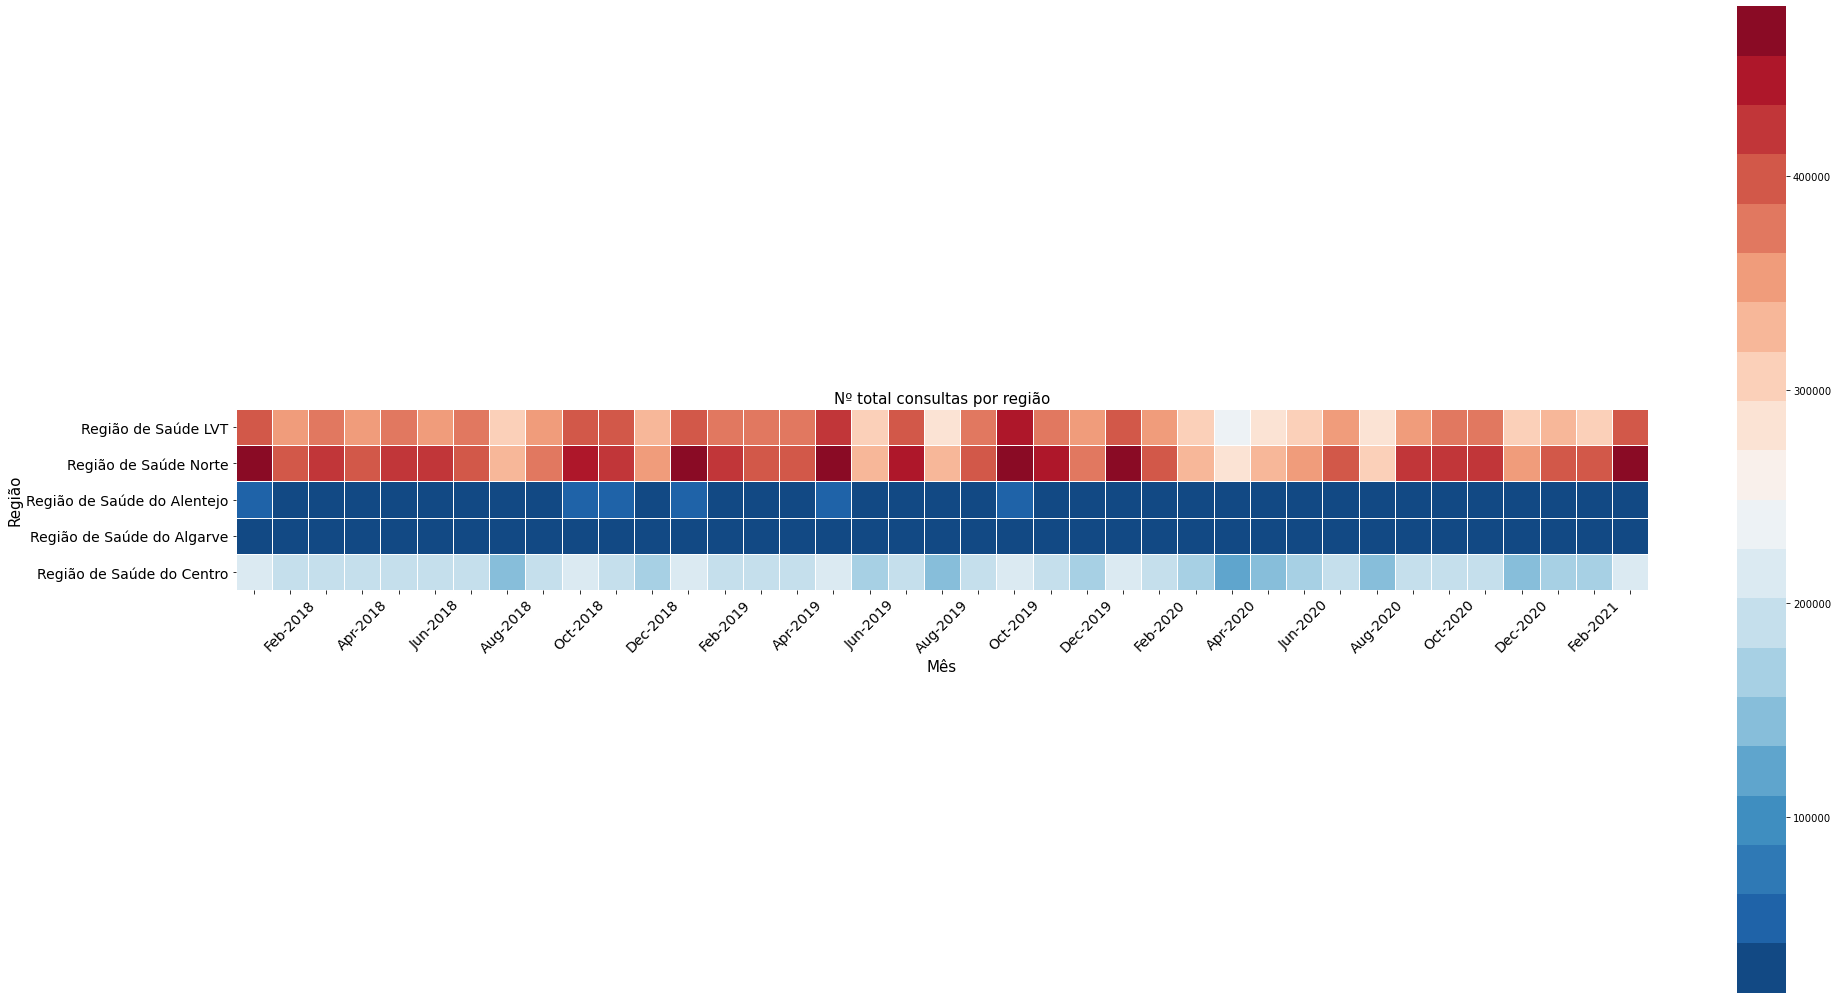

In [221]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(x, monthDict)
ax = sns.heatmap(x, square=True, annot=False, cmap = cmap, annot_kws={"size": 18}, linewidths=.5) #'gist_ncar')
ax.set_yticklabels(x.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região", fontsize=15);
plt.tight_layout()

<AxesSubplot:xlabel='Dia'>

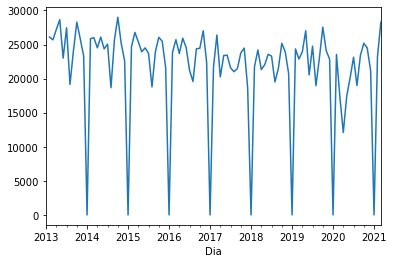

In [186]:
df_hosp_new_idx.loc['Centro Hospitalar Entre Douro e Vouga, EPE', 'Nº Consultas Médicas Total'].sort_index().diff().clip(0).plot()

<AxesSubplot:xlabel='Dia', ylabel='Nº Consultas Médicas Total'>

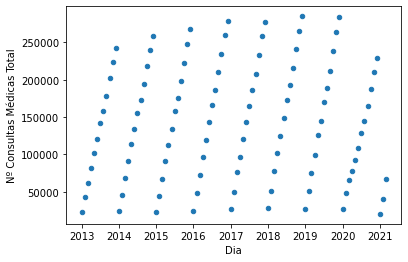

In [166]:
df_hosp[df_hosp['Instituição']=='Unidade Local de Saúde de Matosinhos, EPE'].sort_values(by='Dia').loc[:, ['Dia', 'Nº Consultas Médicas Total']].plot(x= 'Dia', y = 'Nº Consultas Médicas Total', kind='scatter')

In [ ]:
pivot_appointments = pd.pivot_table(df_hosp, values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

In [154]:
pivot_appointments

Dia                          2013-01-01  2013-02-01  2013-03-01  2013-04-01  \
Região                                                                        
Região de Saúde LVT              383984      725954     1062755     1433688   
Região de Saúde Norte            415816      781761     1141966     1531970   
Região de Saúde do Alentejo       39734       75584      110638      150424   
Região de Saúde do Algarve        27976       53355       78470      105889   
Região de Saúde do Centro        201905      382938      558871      749493   

Dia                          2013-05-01  2013-06-01  2013-07-01  2013-08-01  \
Região                                                                        
Região de Saúde LVT             1828824     2135333     2493534     2761436   
Região de Saúde Norte           1942998     2268486     2657313     2946166   
Região de Saúde do Alentejo      191998      225228      261940      290300   
Região de Saúde do Algarve       134383      158248      186320      208558   
Região de Saúde do Centro        943360     1119909     1303350     1432006   

Dia                          2013-09-01  2013-10-01  ...  2020-06-01  \
Região                                               ...               
Região de Saúde LVT             3106591     3510895  ...     1913427   
Região de Saúde Norte           3311921     3746657  ...     2151937   
Região de Saúde do Alentejo      325707      367152  ...      174868   
Região de Saúde do Algarve       232808      261749  ...      134180   
Região de Saúde do Centro       1610253     1822504  ...      975263   

Dia                          2020-07-01  2020-08-01  2020-09-01  2020-10-01  \
Região                                                                        
Região de Saúde LVT             2262002     2538003     2899135     3271245   
Região de Saúde Norte           2558940     2876223     3292637     3723881   
Região de Saúde do Alentejo      207913      236304      270910      306223   
Região de Saúde do Algarve       158517      179012      203514      228917   
Região de Saúde do Centro       1155463     1290764     1477572     1669587   

Dia                          2020-11-01  2020-12-01  2021-01-01  2021-02-01  \
Região                                                                        
Região de Saúde LVT             3652304     3955715      326939      638820   
Região de Saúde Norte           4152394     4501529      403584      797184   
Região de Saúde do Alentejo      341701      371798       27826       55104   
Região de Saúde do Algarve       256357      277591       24104       46747   
Região de Saúde do Centro       1865984     2018946      171966      333349   

Dia                          2021-03-01  
Região                                   
Região de Saúde LVT             1044122  
Região de Saúde Norte           1276823  
Região de Saúde do Alentejo       94244  
Região de Saúde do Algarve        76900  
Região de Saúde do Centro        545110  

[5 rows x 99 columns]

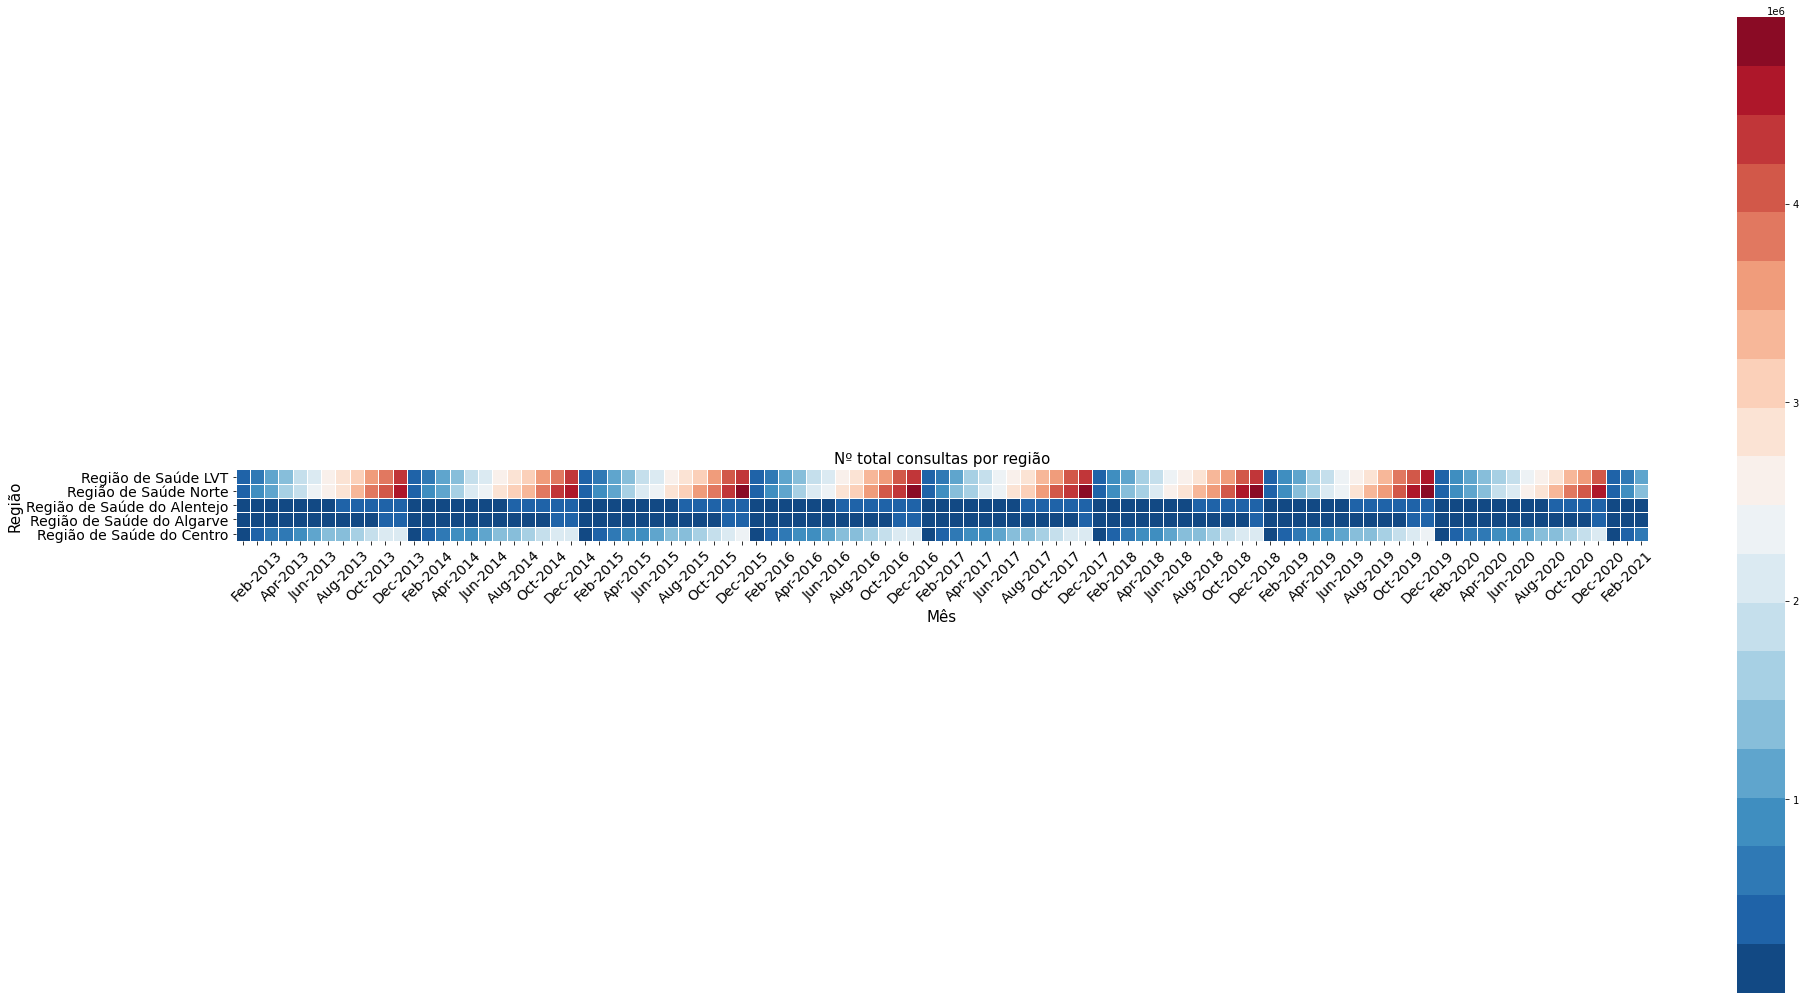

In [152]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(pivot_appointments, monthDict)
ax = sns.heatmap(pivot_appointments, square=True, annot=False, cmap = cmap, annot_kws={"size": 18}, linewidths=.5) #'gist_ncar')
ax.set_yticklabels(pivot_appointments.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região", fontsize=15);
plt.tight_layout()

# Desde Jan 2019 

In [ ]:
pivot_appointments_jan19 = pd.pivot_table(df_hosp, values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

In [ ]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(pivot_appointments, monthDict)
ax = sns.heatmap(pivot_appointments, square=True, annot=False, cmap = cmap, annot_kws={"size": 18}, linewidths=.5) #'gist_ncar')
ax.set_yticklabels(pivot_appointments.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região", fontsize=15);
plt.tight_layout()

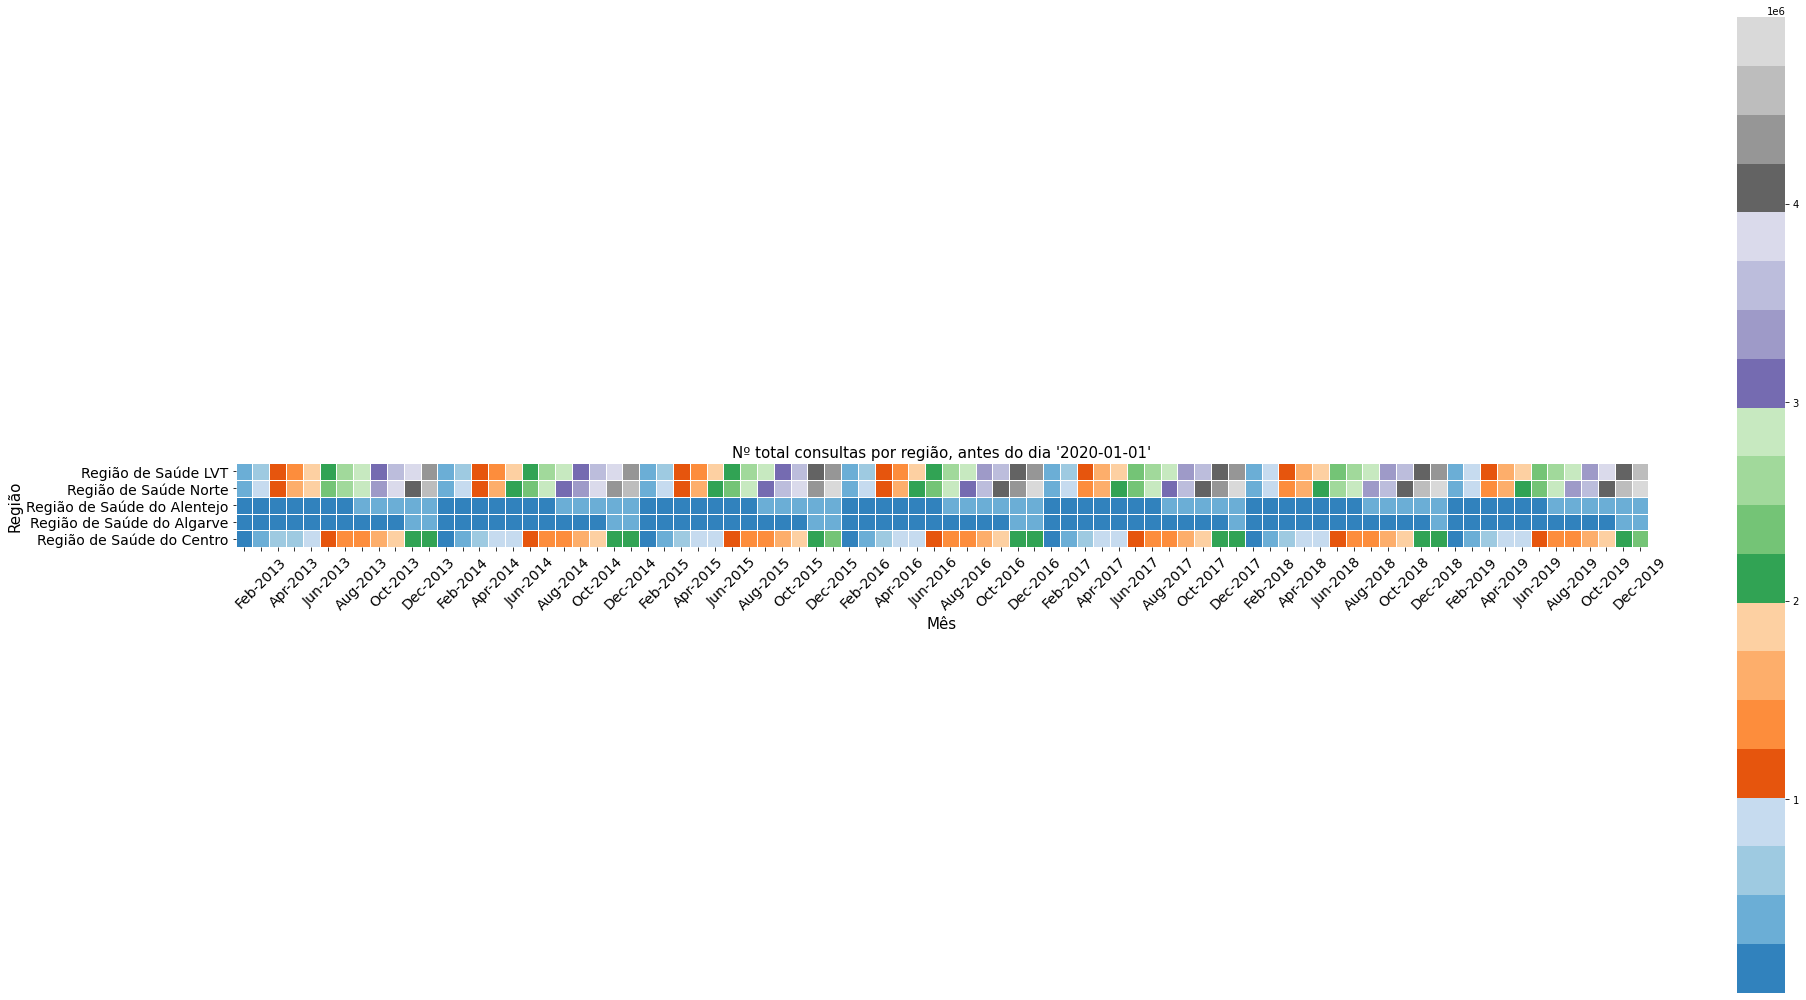

In [101]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(pivot_appointments_bf, monthDict)
ax = sns.heatmap(pivot_appointments_bf, square=True, annot=False, cmap = cmap, annot_kws={"size": 18}, linewidths=.5) #'gist_ncar')
ax.set_yticklabels(pivot_appointments_bf.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região, antes do dia '{}'".format(covid_start_date), fontsize=15);
plt.tight_layout()

In [102]:
pivot_appointments_af = pd.pivot_table(df_hosp.loc[after_covid_days], values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

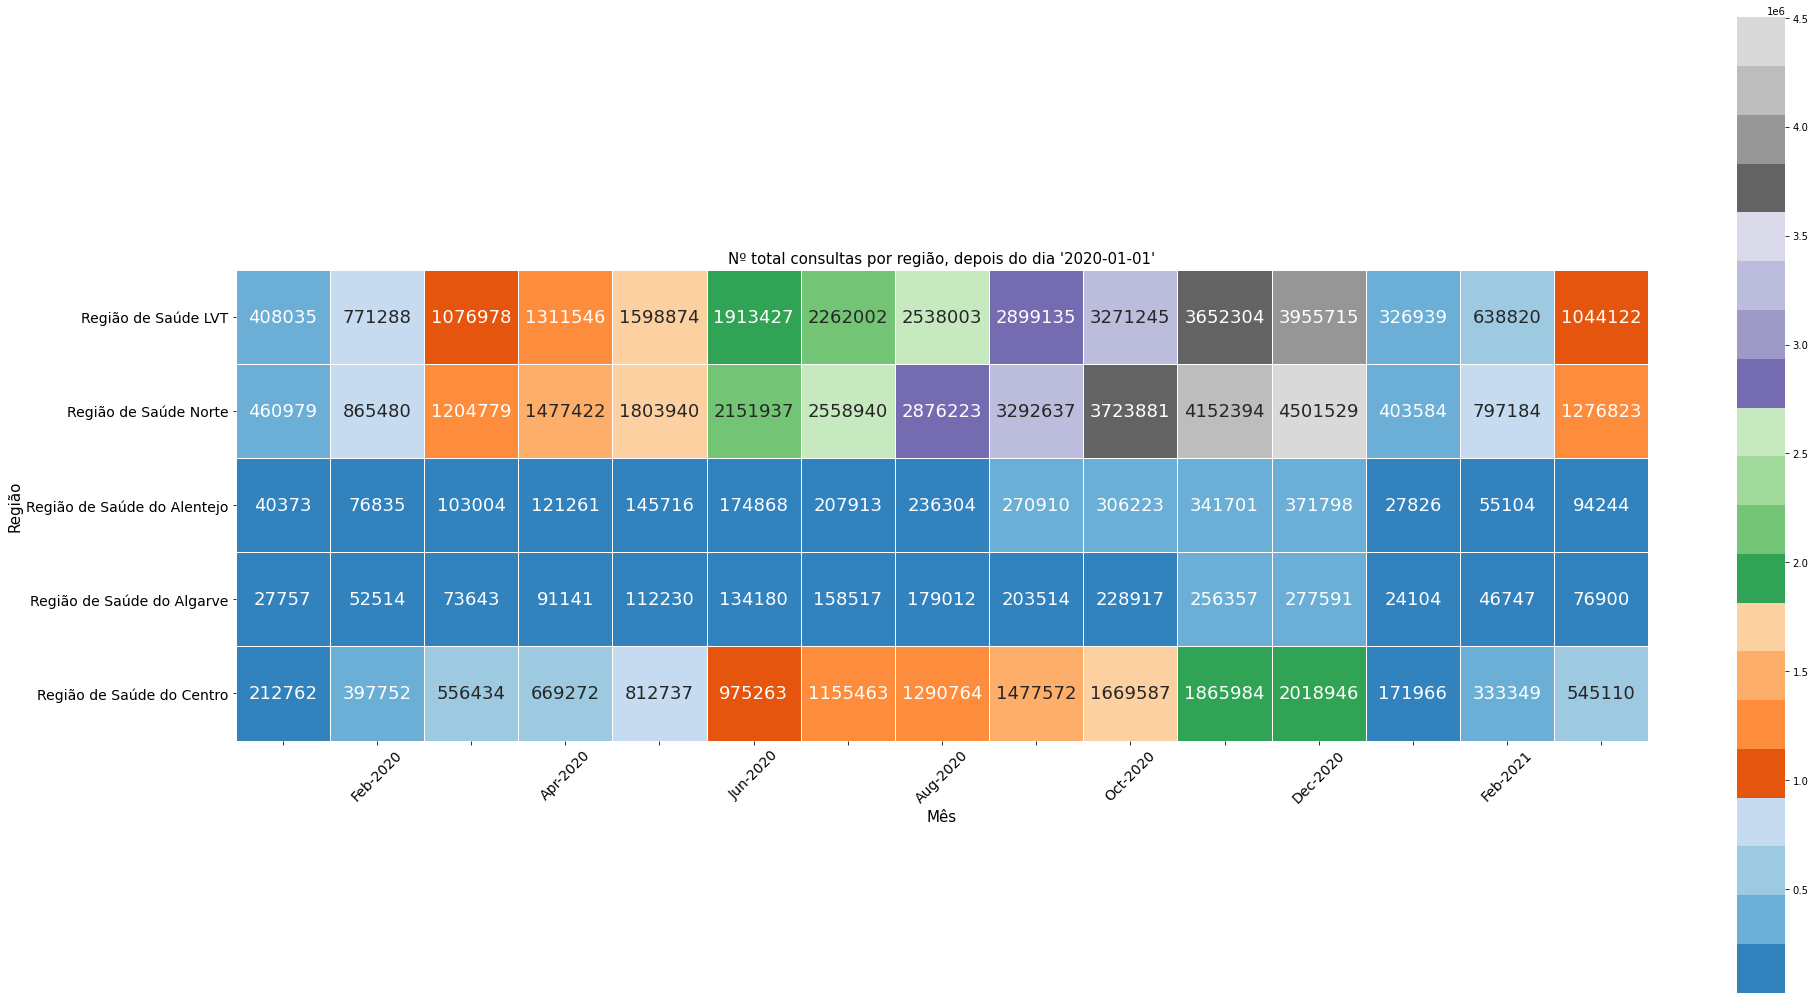

In [103]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(pivot_appointments_af, monthDict)
#cmap = 'gist_ncar'
ax = sns.heatmap(pivot_appointments_af, square=True, annot=True, cmap = cmap, annot_kws={"size": 18}, fmt='d', linewidths=.5) #'gist_ncar')
ax.set_yticklabels(pivot_appointments_af.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região, depois do dia '{}'".format(covid_start_date), fontsize=15);
plt.tight_layout()

# média de consultas por região, antes e depois da pandemia começar

In [104]:
df_hosp_new_index = df_hosp.sort_values(by='Dia').set_index('Dia')
df_hosp_new_index = df_hosp_new_index.drop('Período', axis=1)

In [105]:
df_hosp_new_index['Ano'] = df_hosp_new_index.index.year

In [106]:
df_hosp_new_index.head()

Região  \
Dia                                       
2013-01-01  Região de Saúde do Alentejo   
2013-01-01          Região de Saúde LVT   
2013-01-01          Região de Saúde LVT   
2013-01-01          Região de Saúde LVT   
2013-01-01          Região de Saúde LVT   

                                                  Instituição  \
Dia                                                             
2013-01-01  Unidade Local de Saúde do Litoral Alentejano, EPE   
2013-01-01               Hospital de Vila Franca de Xira, PPP   
2013-01-01                               Instituto Gama Pinto   
2013-01-01                       Hospital Garcia de Orta, EPE   
2013-01-01    Hospital Professor Doutor Fernando Fonseca, EPE   

           Localização Geográfica  Nº Consultas Médicas Total  \
Dia                                                             
2013-01-01  38.0162314,-8.6956768                        5680   
2013-01-01    38.977235,-8.984506                        9231   
2013-01-01   38.7218793,-9.144249                        4759   
2013-01-01  38.6658713,-9.1822554                       24763   
2013-01-01  38.7422257,-9.2264834                       25665   

            Nº Primeiras Consultas  Nº Consultas Subsequentes   Ano  
Dia                                                                  
2013-01-01                    1635                       4045  2013  
2013-01-01                    3521                       5710  2013  
2013-01-01                    2542                       2217  2013  
2013-01-01                    7058                      17705  2013  
2013-01-01                    6855                      18810  2013

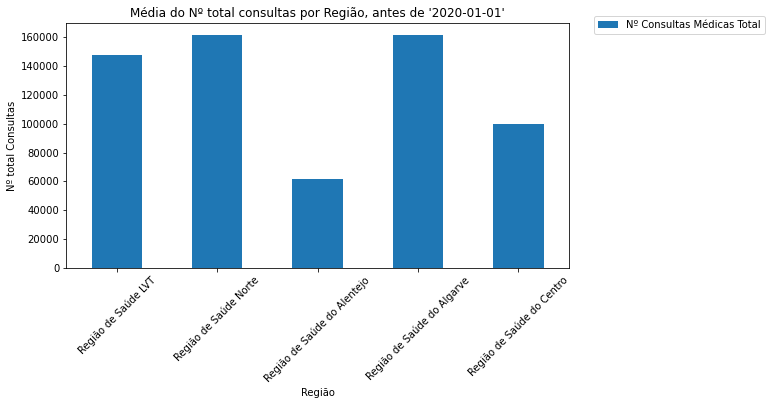

In [107]:
xlabels = df_hosp_new_index.loc[df_hosp_new_index.index < covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().index
ax = df_hosp_new_index.loc[df_hosp_new_index.index < covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().plot(kind='bar', figsize=(6*1.5,3*1.5));
ax.set_xticklabels(xlabels, rotation=45);
ax.legend(bbox_to_anchor=(1.4, 1.05))
ax.set_ylabel('Nº total Consultas');
ax.set_title("Média do Nº total consultas por Região, antes de '{}'".format(covid_start_date));

In [108]:
df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean()

Nº Consultas Médicas Total
Região                                                 
Região de Saúde LVT                       115285.137500
Região de Saúde Norte                     131448.883333
Região de Saúde do Alentejo                42901.333333
Região de Saúde do Algarve                129541.600000
Região de Saúde do Centro                  78627.561111

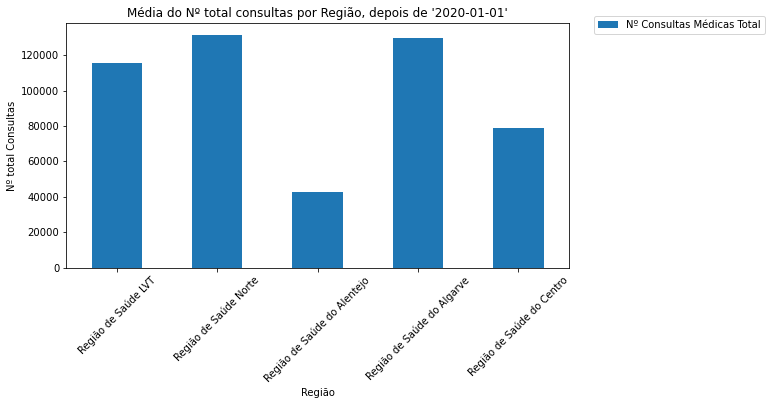

In [109]:
xlabels = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().index
ax = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().plot(kind='bar', figsize=(6*1.5,3*1.5));
ax.set_xticklabels(xlabels, rotation=45);
ax.legend(bbox_to_anchor=(1.4, 1.05))
ax.set_ylabel('Nº total Consultas');
ax.set_title("Média do Nº total consultas por Região, depois de '{}'".format(covid_start_date));

In [110]:
groupby = df_hosp_new_index.groupby(['Região', 'Ano']).mean()
#groupby

In [111]:
groupby.loc[(groupby.index.isin([2013], level=1)) & (groupby.index.isin(['Região de Saúde LVT'], level=0)) ]

Nº Consultas Médicas Total  Nº Primeiras Consultas  \
Região              Ano                                                        
Região de Saúde LVT 2013               143374.854167            40378.255208   

                          Nº Consultas Subsequentes  
Região              Ano                              
Região de Saúde LVT 2013              102996.598958

In [112]:
# total por ano e região
#groupby.groupby(['Ano', 'Região']).sum().filter(like='2013')

In [113]:
df_hosp_new_index

Região  \
Dia                                       
2013-01-01  Região de Saúde do Alentejo   
2013-01-01          Região de Saúde LVT   
2013-01-01          Região de Saúde LVT   
2013-01-01          Região de Saúde LVT   
2013-01-01          Região de Saúde LVT   
...                                 ...   
2021-03-01        Região de Saúde Norte   
2021-03-01        Região de Saúde Norte   
2021-03-01        Região de Saúde Norte   
2021-03-01          Região de Saúde LVT   
2021-03-01        Região de Saúde Norte   

                                                  Instituição  \
Dia                                                             
2013-01-01  Unidade Local de Saúde do Litoral Alentejano, EPE   
2013-01-01               Hospital de Vila Franca de Xira, PPP   
2013-01-01                               Instituto Gama Pinto   
2013-01-01                       Hospital Garcia de Orta, EPE   
2013-01-01    Hospital Professor Doutor Fernando Fonseca, EPE   
...                                                       ...   
2021-03-01              Centro Hospitalar Tâmega e Sousa, EPE   
2021-03-01   Centro Hospitalar Vila Nova de Gaia/Espinho, EPE   
2021-03-01          Unidade Local de Saúde do Alto Minho, EPE   
2021-03-01                               Instituto Gama Pinto   
2021-03-01            Unidade Local de Saúde do Nordeste, EPE   

           Localização Geográfica  Nº Consultas Médicas Total  \
Dia                                                             
2013-01-01  38.0162314,-8.6956768                        5680   
2013-01-01    38.977235,-8.984506                        9231   
2013-01-01   38.7218793,-9.144249                        4759   
2013-01-01  38.6658713,-9.1822554                       24763   
2013-01-01  38.7422257,-9.2264834                       25665   
...                           ...                         ...   
2021-03-01   41.2494561,-8.264901                       83104   
2021-03-01  41.1094138,-8.5972617                      129536   
2021-03-01  41.7056054,-8.8252713                       58813   
2021-03-01   38.7218793,-9.144249                       13571   
2021-03-01  41.8056532,-6.7888197                       23000   

            Nº Primeiras Consultas  Nº Consultas Subsequentes   Ano  
Dia                                                                  
2013-01-01                    1635                       4045  2013  
2013-01-01                    3521                       5710  2013  
2013-01-01                    2542                       2217  2013  
2013-01-01                    7058                      17705  2013  
2013-01-01                    6855                      18810  2013  
...                            ...                        ...   ...  
2021-03-01                   31078                      52026  2021  
2021-03-01                   43869                      85667  2021  
2021-03-01                   16768                      42045  2021  
2021-03-01                    5195                       8376  2021  
2021-03-01                    9191                      13809  2021  

[4875 rows x 7 columns]

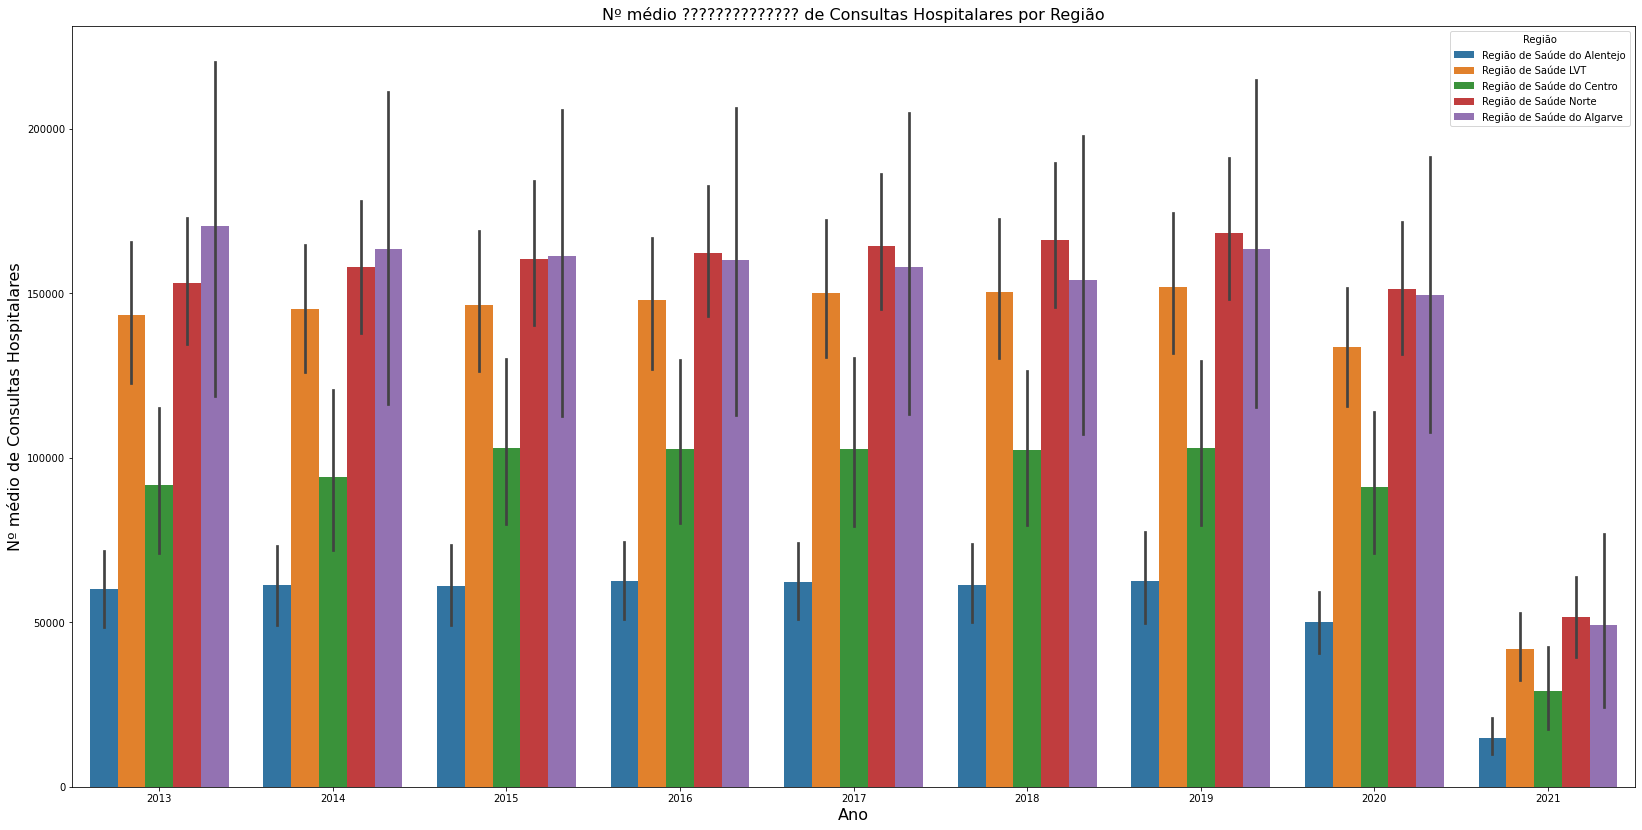

In [114]:
fontsize = 16
fig, ax = plt.subplots(figsize=(28,14))
ax = sns.barplot(x = 'Ano', y = 'Nº Consultas Médicas Total', hue='Região', data=df_hosp_new_index);
ax.set_xlabel('Ano', fontsize=fontsize);
ax.set_ylabel('Nº médio de Consultas Hospitalares', fontsize=fontsize);
ax.set_title("Nº médio ?????????????? de Consultas Hospitalares por Região", fontsize=fontsize);
#sns.set(font_scale = 2)
#for i, p in enumerate(ax.patches):
 #   height = p.get_height()
    #print(f" h {height}, i {i}, p {p} {p.get_x() + .05}")
  #  ax.text(p.get_x(), 1.05*height, str(round(height,1)))
    # apresentar % de consultas naquele ano, para cada região (barra)

# TO DO:

# - top 5 de instituições por região que MAIS consultas fazem, por Ano

# - top 5 de instituições por região que MENOS consultas fazem, por Ano

# - existe alguma relação entre as regiões com mais consultas e as regiões menos afetadas pelo covid? (cruzando c o dataset df_covid)

    * região do algarve (1 instituição) faz tantas consultas como região norte (18 instituições) (!!!!) e tem menos casos confirmados

# obter as 5 instituições de cada região que mais consultas fizeram, em cada ano

In [115]:
df_hosp_best_institutions = df_hosp_new_index.groupby(['Ano','Região', 'Instituição']).mean().sort_values(by=['Ano', 'Nº Consultas Médicas Total'], ascending=False)
df_hosp_best_institutions

Nº Consultas Médicas Total  \
Ano  Região                    Instituição                                                                      
2021 Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE                 134545.333333   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE                129609.666667   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                    118490.333333   
     Região de Saúde LVT       Centro Hospitalar Universitário Lisboa Central,...               108114.333333   
                               Centro Hospitalar Universitário de Lisboa Norte...               107277.666667   
...                                                                                                       ...   
2013 Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                  26911.000000   
     Região de Saúde do Centro Hospital Dr. Francisco Zagalo                                     16399.333333   
                               Hospital Arcebispo João Crisóstomo                                 8420.916667   
                               Hospital José Luciano de Castro                                    7303.583333   
                               Centro Medicina de Reabilitação da Região Centr...                 2100.000000   

                                                                                   Nº Primeiras Consultas  \
Ano  Região                    Instituição                                                                  
2021 Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE              39013.333333   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE             29473.333333   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                 26197.333333   
     Região de Saúde LVT       Centro Hospitalar Universitário Lisboa Central,...            27440.000000   
                               Centro Hospitalar Universitário de Lisboa Norte...            27429.000000   
...                                                                                                   ...   
2013 Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                               2304.916667   
     Região de Saúde do Centro Hospital Dr. Francisco Zagalo                                  5290.583333   
                               Hospital Arcebispo João Crisóstomo                             4415.083333   
                               Hospital José Luciano de Castro                                2838.666667   
                               Centro Medicina de Reabilitação da Região Centr...              871.416667   

                                                                                   Nº Consultas Subsequentes  
Ano  Região                    Instituição                                                                    
2021 Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE                 95532.000000  
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE               100136.333333  
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                    92293.000000  
     Região de Saúde LVT       Centro Hospitalar Universitário Lisboa Central,...               80674.333333  
                               Centro Hospitalar Universitário de Lisboa Norte...               79848.666667  
...                                                                                                      ...  
2013 Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                 24606.083333  
     Região de Saúde do Centro Hospital Dr. Francisco Zagalo                                    11108.750000  
                               Hospital Arcebispo João Crisóstomo                    

In [116]:
def getTopAppointments(df):  
    
    topConsultas = pd.DataFrame(columns =  ['Ano', 'Região', 'Instituição', 'Nº Consultas Médicas Total'])
    year_arr = list(df.index.levels[0])
    region_arr = list(df.index.levels[1])

    rows = 0
    for year in year_arr:
        #print(f"--------------- ANO {year} ---------------")
        for reg in region_arr:
         #   print(f"Top 5 instituições de '{reg}' que mais consultas fizeram em {year}:")
            count=1
            while count < 6:
                row = df.loc[(year, reg)].head(count).tail(1)
                inst = row.index.values[0]
                nbr = row['Nº Consultas Médicas Total'][0]
                #print(f" \t # {count} : {inst}' - {nbr} consultas")
                count+=1
                topConsultas.loc[rows, 'Ano'] = year
                topConsultas.loc[rows, 'Região'] = reg
                topConsultas.loc[rows, 'Instituição'] = inst
                topConsultas.loc[rows, 'Nº Consultas Médicas Total'] = float(nbr) 
                topConsultas.loc[rows, 'Rank'] = count-1
                rows+=1
    return topConsultas

In [117]:
topBestAppointments = getTopAppointments(df_hosp_best_institutions)
len(topBestAppointments)

<ipython-input-116-57ebebc4f812>:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  row = df.loc[(year, reg)].head(count).tail(1)


225

In [118]:
topBestAppointments.loc[topBestAppointments.Ano == 2021]

Ano                       Região  \
200  2021          Região de Saúde LVT   
201  2021          Região de Saúde LVT   
202  2021          Região de Saúde LVT   
203  2021          Região de Saúde LVT   
204  2021          Região de Saúde LVT   
205  2021        Região de Saúde Norte   
206  2021        Região de Saúde Norte   
207  2021        Região de Saúde Norte   
208  2021        Região de Saúde Norte   
209  2021        Região de Saúde Norte   
210  2021  Região de Saúde do Alentejo   
211  2021  Região de Saúde do Alentejo   
212  2021  Região de Saúde do Alentejo   
213  2021  Região de Saúde do Alentejo   
214  2021  Região de Saúde do Alentejo   
215  2021   Região de Saúde do Algarve   
216  2021   Região de Saúde do Algarve   
217  2021   Região de Saúde do Algarve   
218  2021   Região de Saúde do Algarve   
219  2021   Região de Saúde do Algarve   
220  2021    Região de Saúde do Centro   
221  2021    Região de Saúde do Centro   
222  2021    Região de Saúde do Centro   
223  2021    Região de Saúde do Centro   
224  2021    Região de Saúde do Centro   

                                           Instituição  \
200  Centro Hospitalar Universitário Lisboa Central...   
201  Centro Hospitalar Universitário de Lisboa Nort...   
202         Centro Hospitalar de Lisboa Ocidental, EPE   
203       Instituto Português Oncologia de Lisboa, EPE   
204                       Hospital Garcia de Orta, EPE   
205   Centro Hospitalar Universitário de São João, EPE   
206      Centro Hospitalar Universitário do Porto, EPE   
207                             Hospital de Braga, EPE   
208   Centro Hospitalar Vila Nova de Gaia/Espinho, EPE   
209              Centro Hospitalar Tâmega e Sousa, EPE   
210              Hospital Espírito Santo de Évora, EPE   
211    Unidade Local de Saúde do Norte Alentejano, EPE   
212      Unidade Local de Saúde do Baixo Alentejo, EPE   
213  Unidade Local de Saúde do Litoral Alentejano, EPE   
214  Unidade Local de Saúde do Litoral Alentejano, EPE   
215     Centro Hospitalar Universitário do Algarve,EPE   
216     Centro Hospitalar Universitário do Algarve,EPE   
217     Centro Hospitalar Universitário do Algarve,EPE   
218     Centro Hospitalar Universitário do Algarve,EPE   
219     Centro Hospitalar Universitário do Algarve,EPE   
220  Centro Hospitalar e Universitário de Coimbra, EPE   
221                   Centro Hospitalar de Leiria, EPE   
222              Centro Hospitalar do Baixo Vouga, EPE   
223               Centro Hospitalar Tondela-Viseu, EPE   
224      Instituto Português Oncologia de Coimbra, EPE   

    Nº Consultas Médicas Total  Rank  
200              108114.333333   1.0  
201              107277.666667   2.0  
202                    72592.0   3.0  
203                    49032.0   4.0  
204                    47334.0   5.0  
205              134545.333333   1.0  
206              118490.333333   2.0  
207               85716.333333   3.0  
208                    84036.0   4.0  
209               53980.666667   5.0  
210               23696.666667   1.0  
211               13139.666667   2.0  
212                    11572.0   3.0  
213               10649.666667   4.0  
214               10649.666667   5.0  
215               49250.333333   1.0  
216               49250.333333   2.0  
217               49250.333333   3.0  
218               49250.333333   4.0  
219               49250.333333   5.0  
220              129609.666667   1.0  
221               49446.333333   2.0  
222               39358.666667   3.0  
223               38305.666667   4.0  
224                    24164.0   5.0

In [119]:
# validar se temos 5 instituições por Região 
topBestAppointments.groupby(['Ano', 'Região']).count()

Instituição  Nº Consultas Médicas Total  \
Ano  Região                                                                 
2013 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2014 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2015 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2016 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2017 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2018 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2019 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2020 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2021 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   

                                  Rank  
Ano  Região                             
2013 Região de Saúde LVT             5  
     Região de Saúde Norte           5  
     Região de Saúde do Alentejo     5  
     Região de Saúde do Algarve      5  
     Região de Saúde do Centro       5  
2014 Região de Saúde LVT             5  
     Região de Saúde Norte           5  
     Região de Saúde do Alentejo     5  
    

# obter as 5 instituições de cada região que menos consultas fizeram, em cada ano

In [120]:
df_hosp_worst_institutions = df_hosp_new_index.groupby(['Ano','Região', 'Instituição']).mean().sort_values(by=['Ano', 'Nº Consultas Médicas Total'], ascending=True)
df_hosp_worst_institutions

Nº Consultas Médicas Total  \
Ano  Região                    Instituição                                                                      
2013 Região de Saúde do Centro Centro Medicina de Reabilitação da Região Centr...                 2100.000000   
                               Hospital José Luciano de Castro                                    7303.583333   
                               Hospital Arcebispo João Crisóstomo                                 8420.916667   
                               Hospital Dr. Francisco Zagalo                                     16399.333333   
     Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                  26911.000000   
...                                                                                                       ...   
2021 Região de Saúde LVT       Centro Hospitalar Universitário de Lisboa Norte...               107277.666667   
                               Centro Hospitalar Universitário Lisboa Central,...               108114.333333   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                    118490.333333   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE                129609.666667   
     Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE                 134545.333333   

                                                                                   Nº Primeiras Consultas  \
Ano  Região                    Instituição                                                                  
2013 Região de Saúde do Centro Centro Medicina de Reabilitação da Região Centr...              871.416667   
                               Hospital José Luciano de Castro                                2838.666667   
                               Hospital Arcebispo João Crisóstomo                             4415.083333   
                               Hospital Dr. Francisco Zagalo                                  5290.583333   
     Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                               2304.916667   
...                                                                                                   ...   
2021 Região de Saúde LVT       Centro Hospitalar Universitário de Lisboa Norte...            27429.000000   
                               Centro Hospitalar Universitário Lisboa Central,...            27440.000000   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                 26197.333333   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE             29473.333333   
     Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE              39013.333333   

                                                                                   Nº Consultas Subsequentes  
Ano  Região                    Instituição                                                                    
2013 Região de Saúde do Centro Centro Medicina de Reabilitação da Região Centr...                1228.583333  
                               Hospital José Luciano de Castro                                   4464.916667  
                               Hospital Arcebispo João Crisóstomo                                4005.833333  
                               Hospital Dr. Francisco Zagalo                                    11108.750000  
     Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                 24606.083333  
...                                                                                                      ...  
2021 Região de Saúde LVT       Centro Hospitalar Universitário de Lisboa Norte...               79848.666667  
                               Centro Hospitalar Universitário Lisboa Central,...               80674.333333  
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE         

In [121]:
topWorstAppointments = getTopAppointments(df_hosp_worst_institutions)
len(topWorstAppointments)

<ipython-input-116-57ebebc4f812>:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  row = df.loc[(year, reg)].head(count).tail(1)


225

In [122]:
topWorstAppointments

Ano                     Região  \
0    2013        Região de Saúde LVT   
1    2013        Região de Saúde LVT   
2    2013        Região de Saúde LVT   
3    2013        Região de Saúde LVT   
4    2013        Região de Saúde LVT   
..    ...                        ...   
220  2021  Região de Saúde do Centro   
221  2021  Região de Saúde do Centro   
222  2021  Região de Saúde do Centro   
223  2021  Região de Saúde do Centro   
224  2021  Região de Saúde do Centro   

                                           Instituição  \
0                                 Instituto Gama Pinto   
1             Centro Hospitalar Psiquiátrico de Lisboa   
2                 Hospital de Vila Franca de Xira, PPP   
3                             Hospital de Cascais, PPP   
4                      Centro Hospitalar do Oeste, EPE   
..                                                 ...   
220  Centro Medicina de Reabilitação da Região Cent...   
221                 Hospital Arcebispo João Crisóstomo   
222                      Hospital Dr. Francisco Zagalo   
223              Unidade Local de Saúde da Guarda, EPE   
224      Unidade Local de Saúde de Castelo Branco, EPE   

    Nº Consultas Médicas Total  Rank  
0                 29786.916667   1.0  
1                      34323.0   2.0  
2                     57543.25   3.0  
3                 73258.833333   4.0  
4                 76502.416667   5.0  
..                         ...   ...  
220                 746.333333   1.0  
221                2844.666667   2.0  
222                4223.666667   3.0  
223               12367.333333   4.0  
224               12632.333333   5.0  

[225 rows x 5 columns]

In [123]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# função que cria um pie plot com a % de consultas em cada instituição, realizadas para a região "region" no ano "year"

In [124]:
def plotPiePerRegionAndYear(region, year, df, isBest):
    
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    #data = topWorstAppointments.loc[(topWorstAppointments['Ano'] == 2013) & (topWorstAppointments['Região'] == 'Região de Saúde LVT')]['Nº Consultas Médicas Total'].values;
    data = df['Nº Consultas Médicas Total'].values
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"));
    labels = df['Instituição']
    ax.legend(wedges, labels, title="Instituição", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    
    type_str = 'menos'
    if isBest:
        type_str = 'mais'
        
    ax.set_title("Top 5 Instituições de '{}' que {} Consultas Hospitalares fizeram em {}".format(region, type_str, year))
    plt.show();

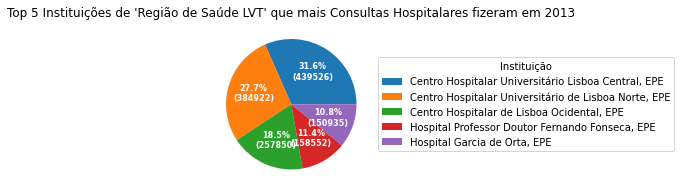

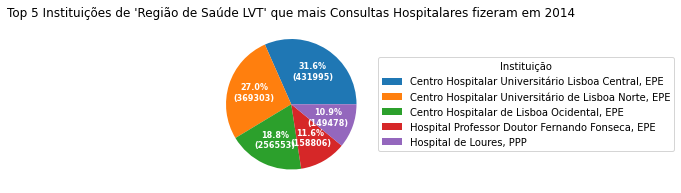

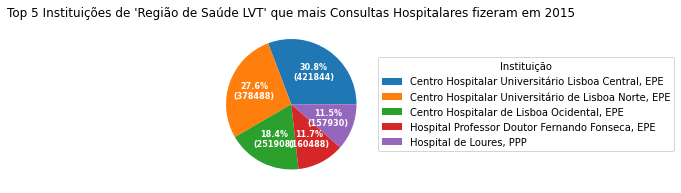

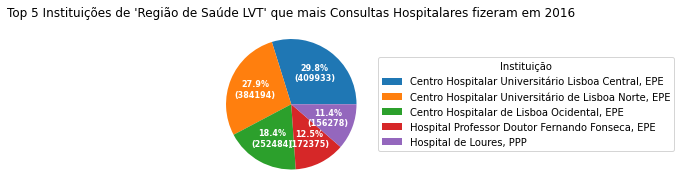

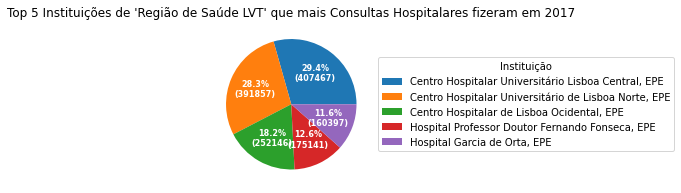

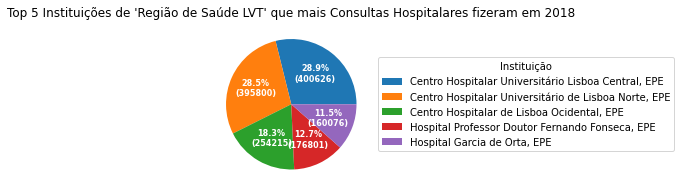

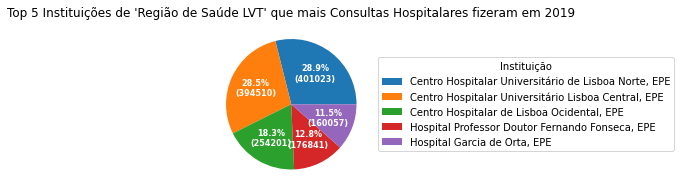

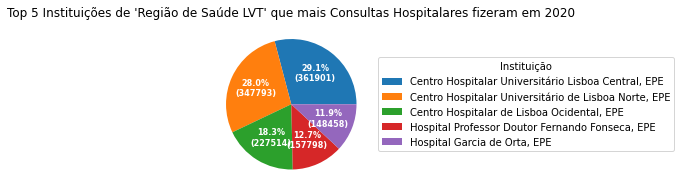

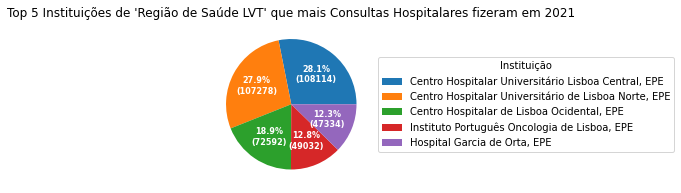

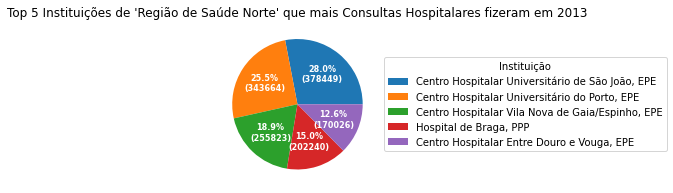

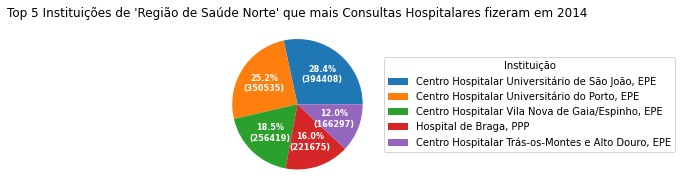

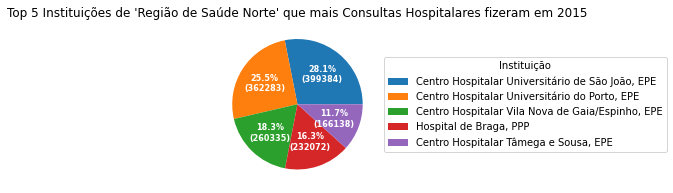

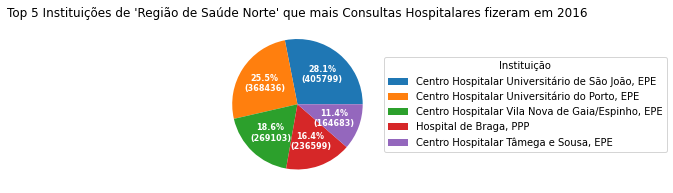

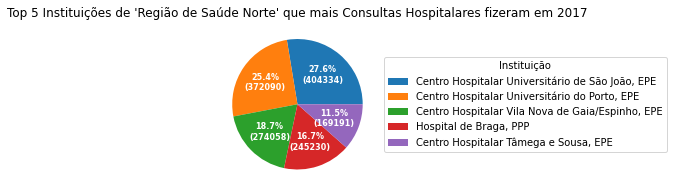

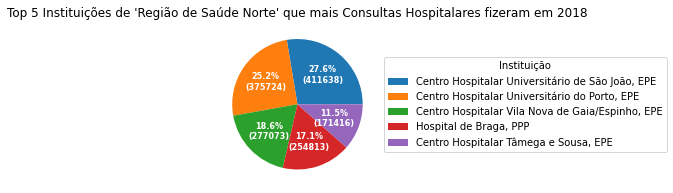

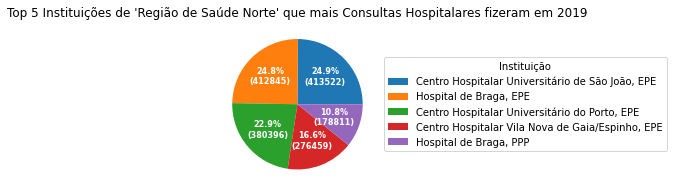

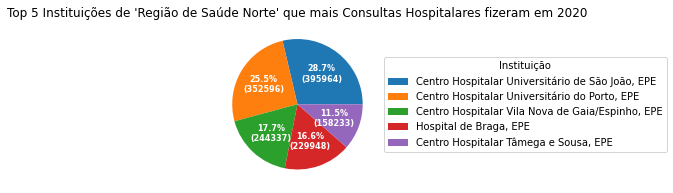

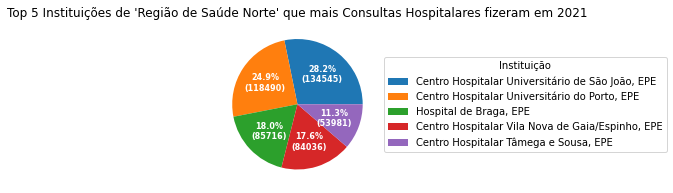

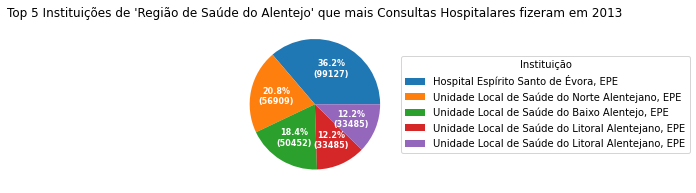

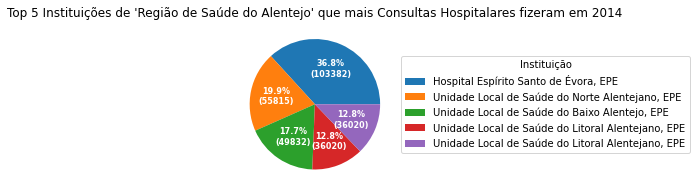

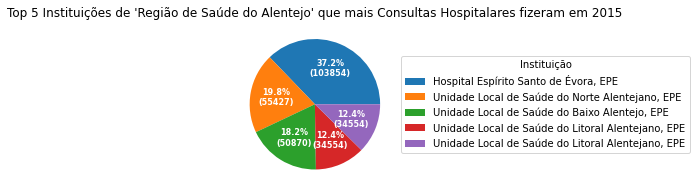

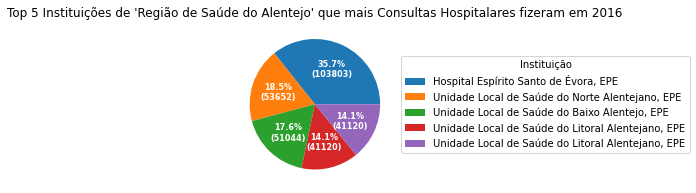

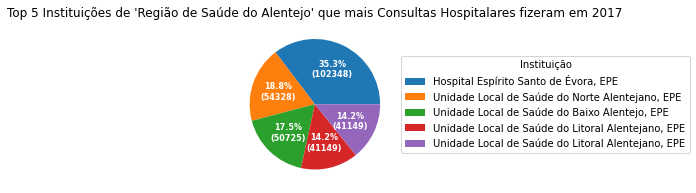

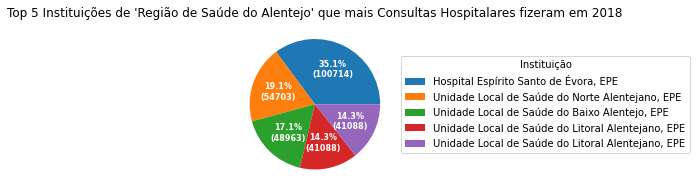

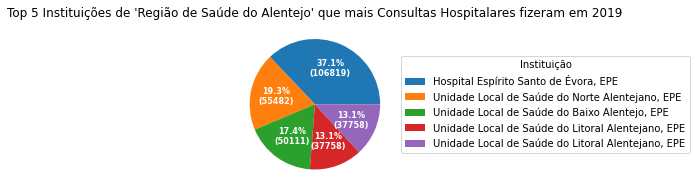

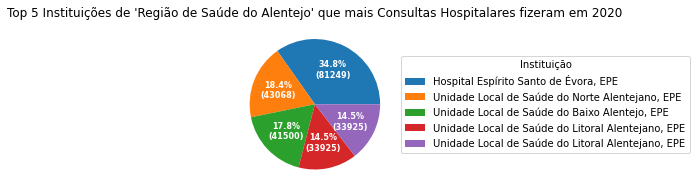

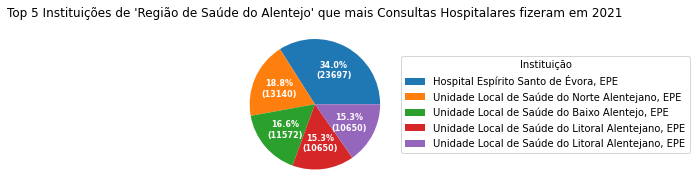

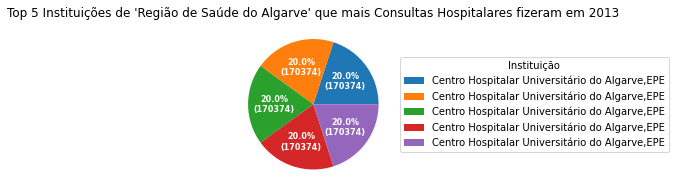

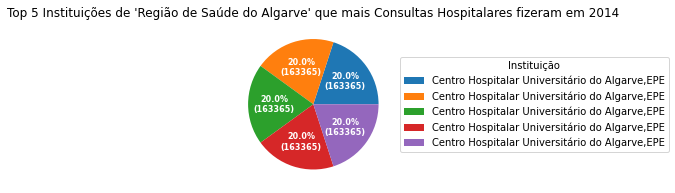

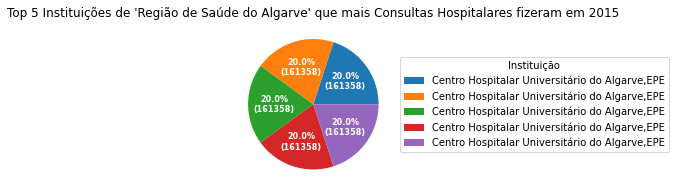

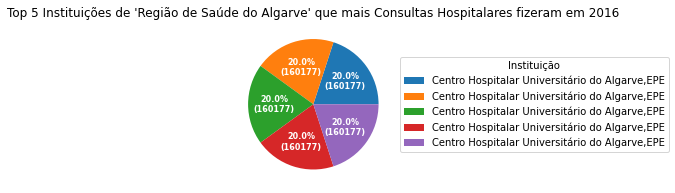

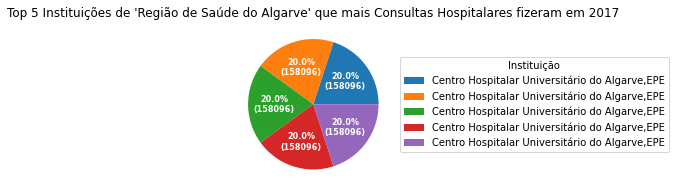

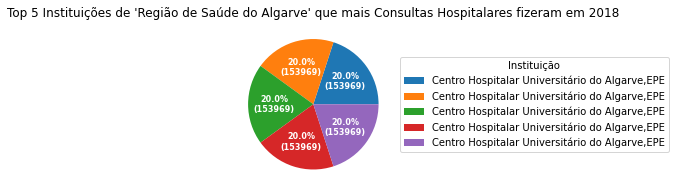

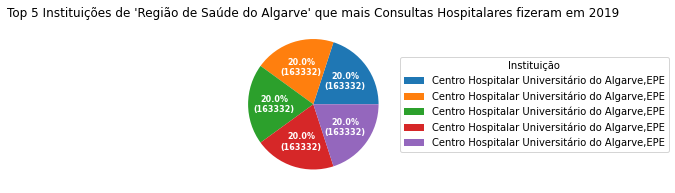

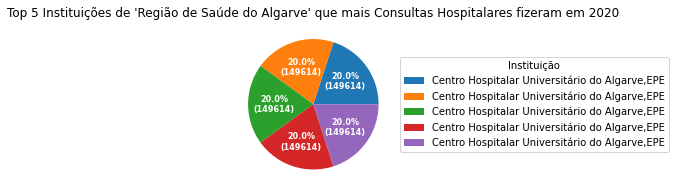

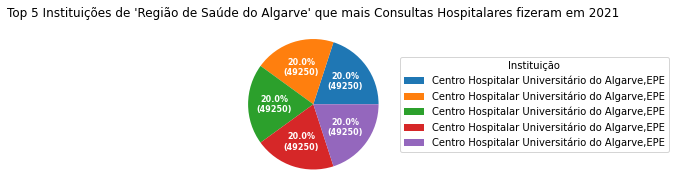

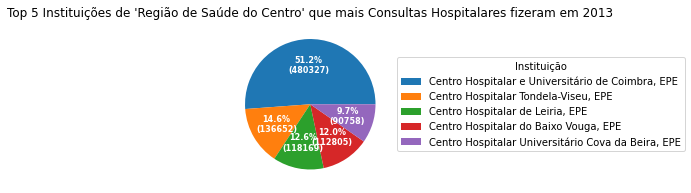

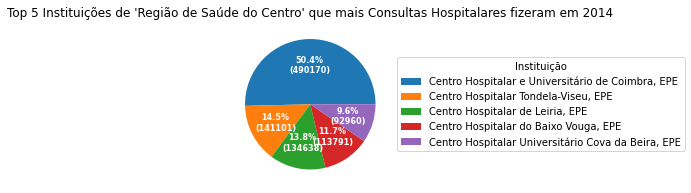

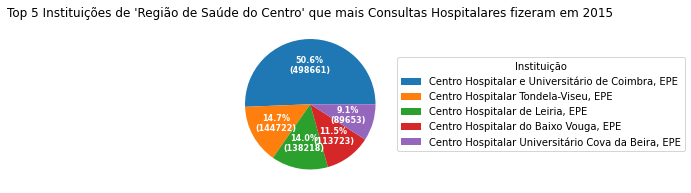

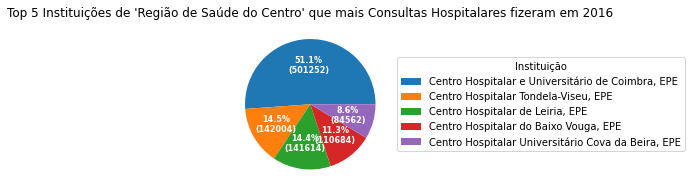

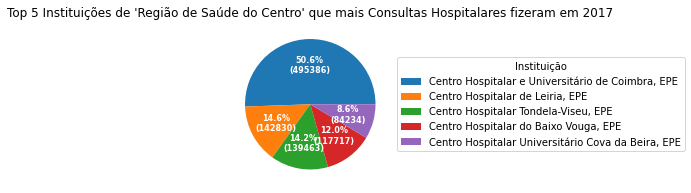

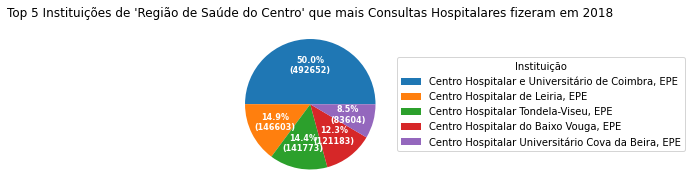

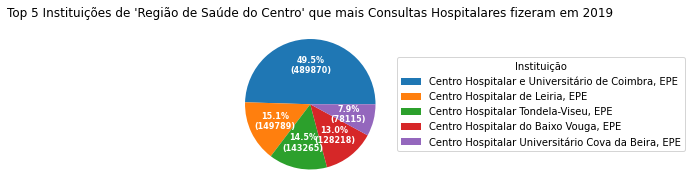

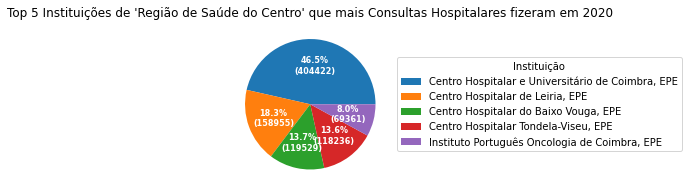

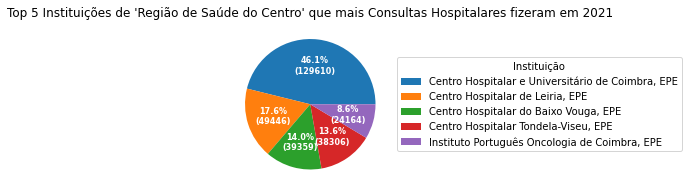

In [125]:
isBest = 1 
year_arr = topBestAppointments['Ano'].unique()
region_arr = topBestAppointments['Região'].unique()

for reg in region_arr:
    for year in year_arr:
        data = topBestAppointments.loc[(topBestAppointments['Ano'] == year) & (topBestAppointments['Região'] == reg)]
        plotPiePerRegionAndYear(reg, year, data, 1)

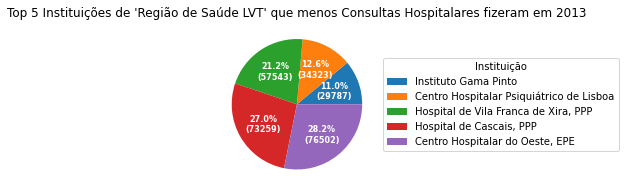

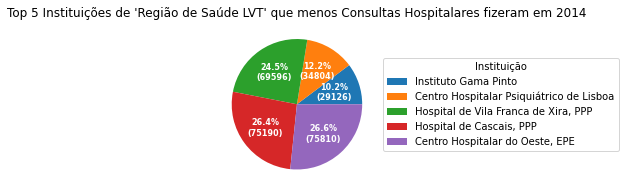

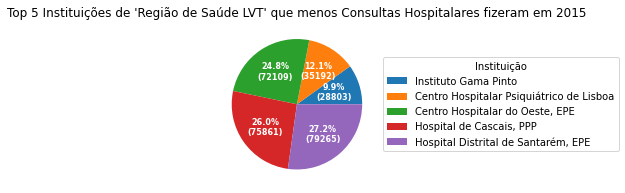

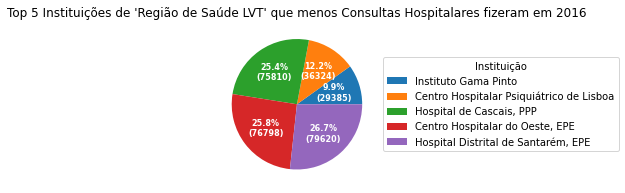

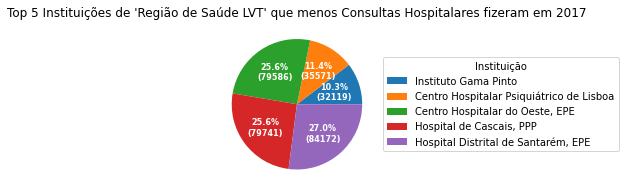

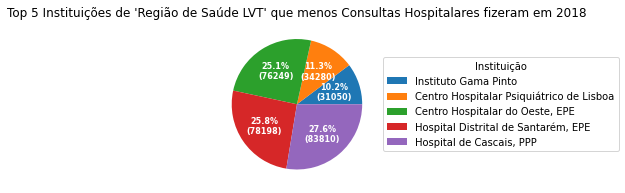

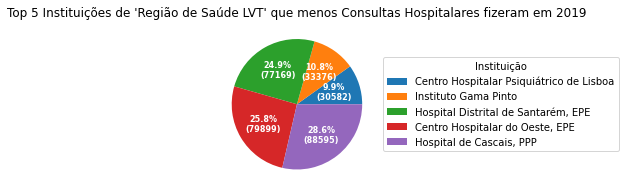

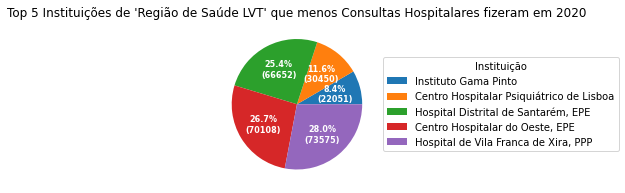

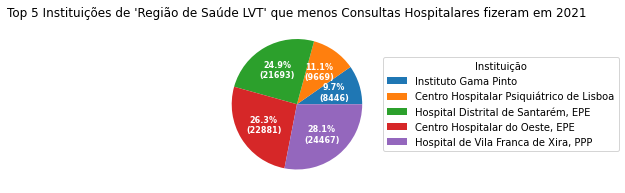

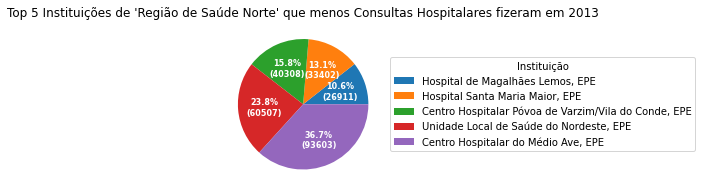

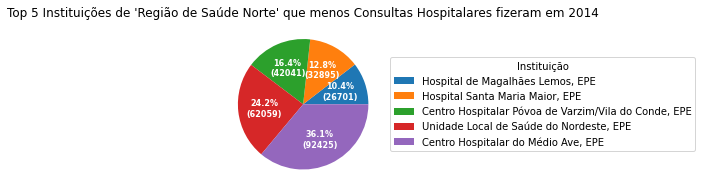

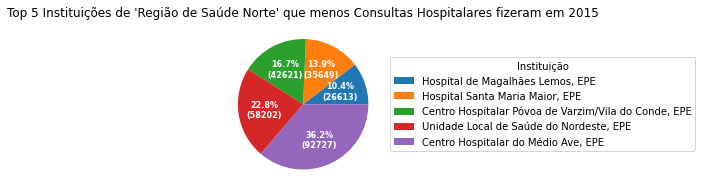

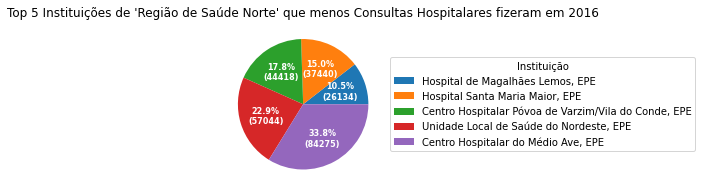

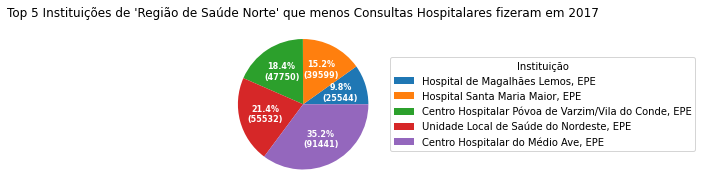

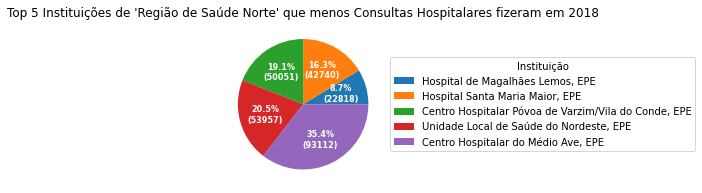

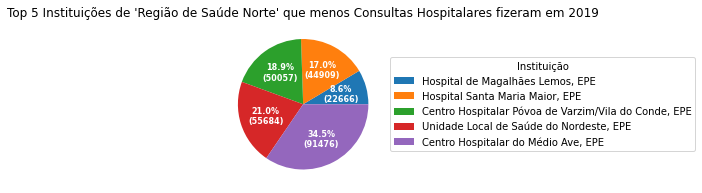

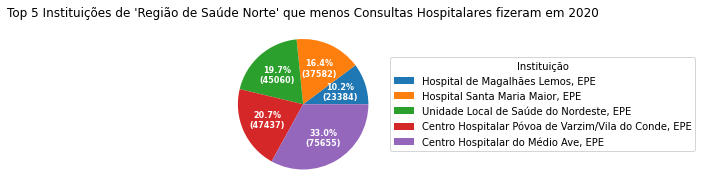

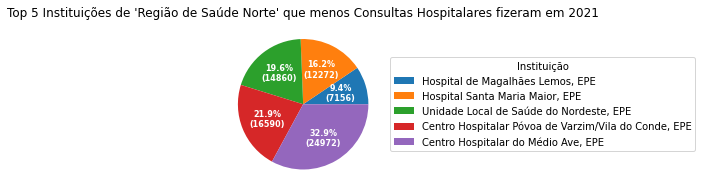

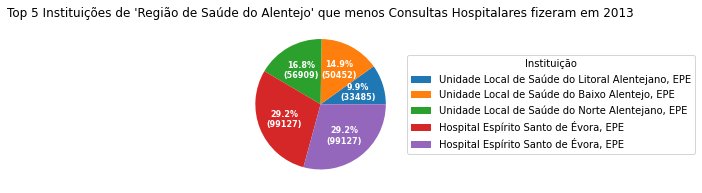

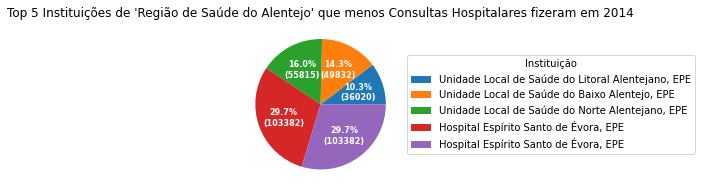

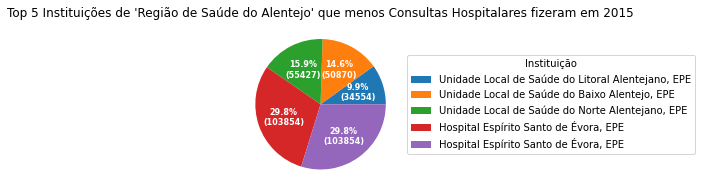

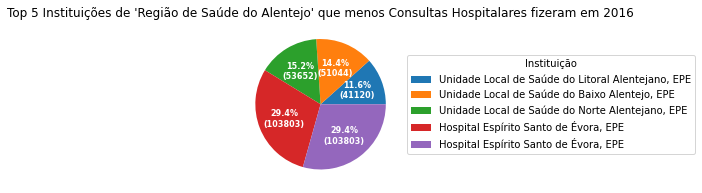

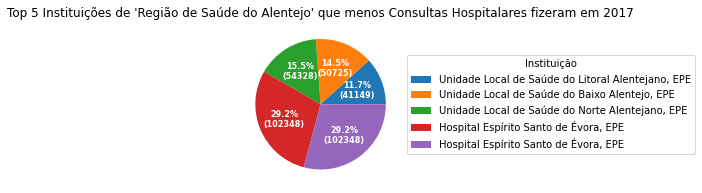

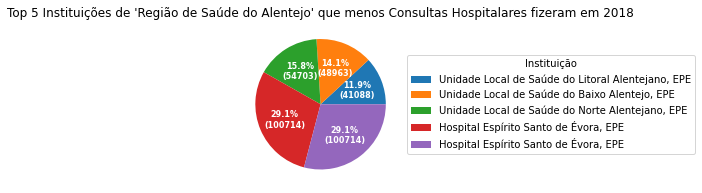

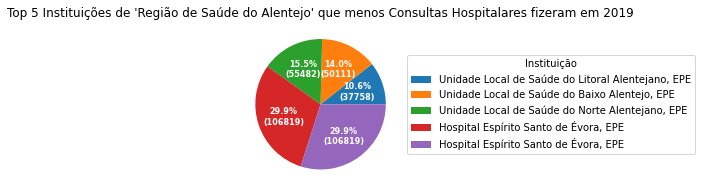

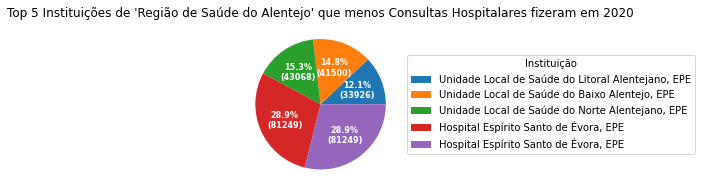

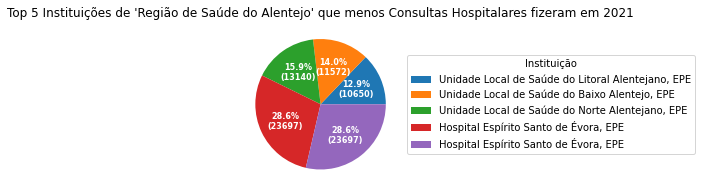

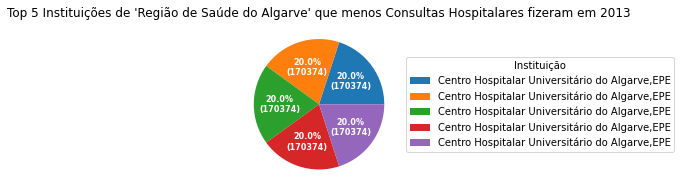

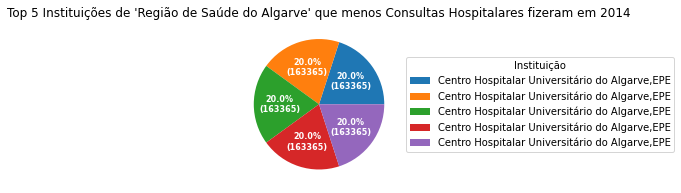

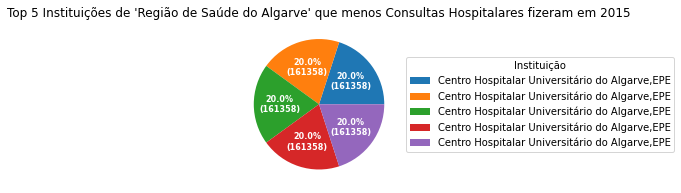

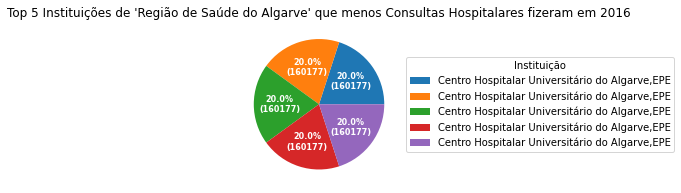

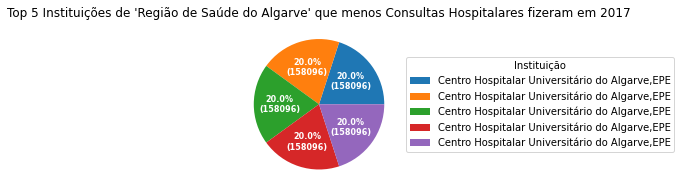

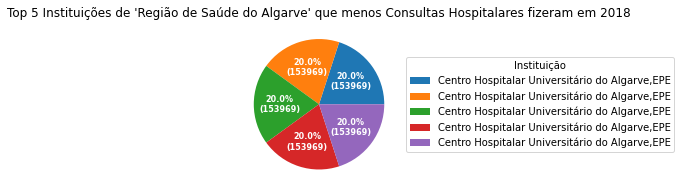

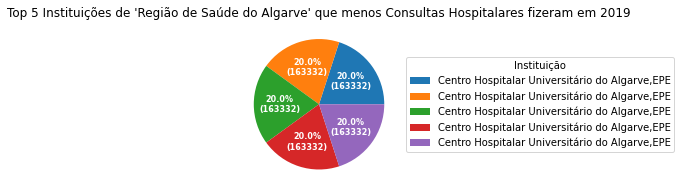

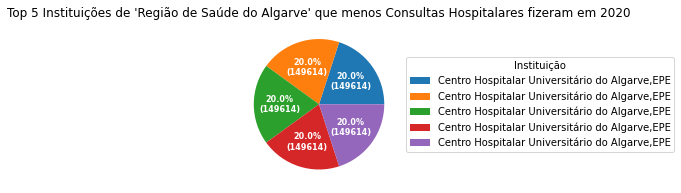

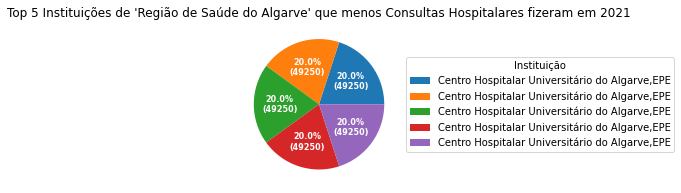

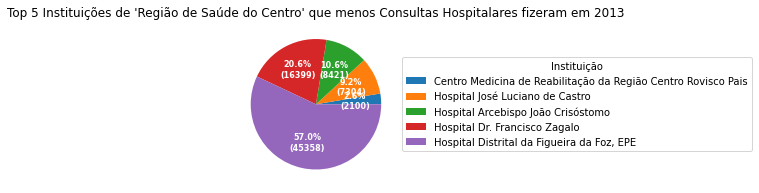

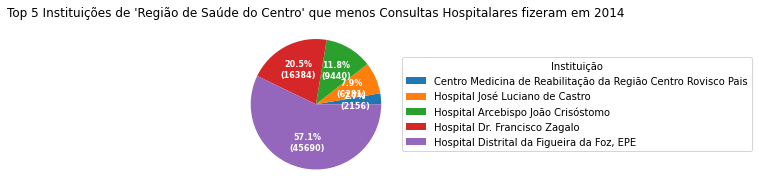

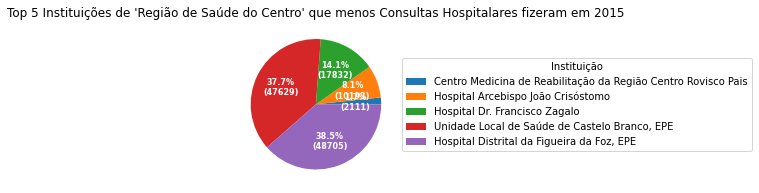

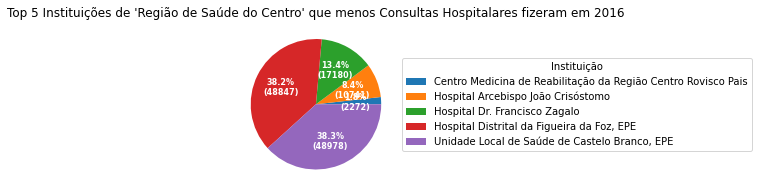

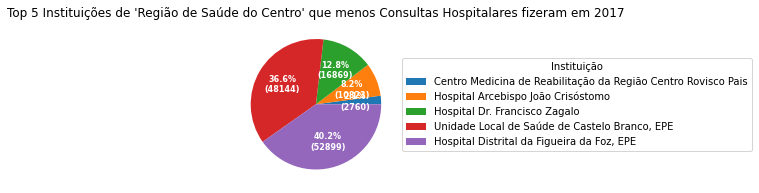

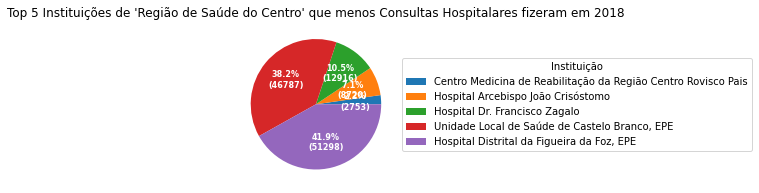

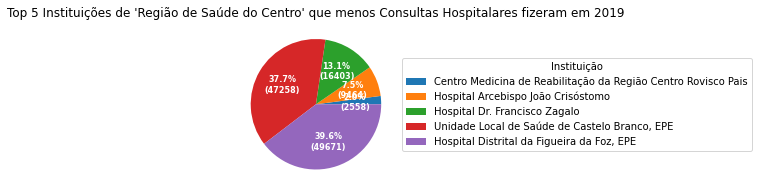

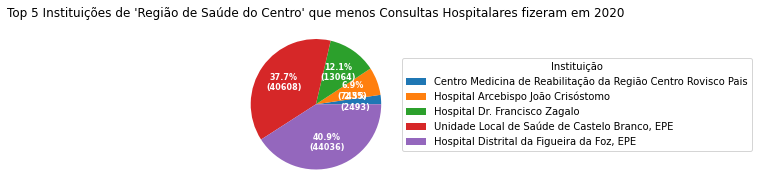

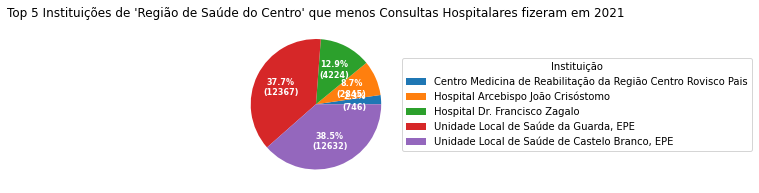

In [126]:
isBest = 0

year_arr = topWorstAppointments['Ano'].unique()
region_arr = topWorstAppointments['Região'].unique()

for reg in region_arr:
    for year in year_arr:
        data = topWorstAppointments.loc[(topWorstAppointments['Ano'] == year) & (topWorstAppointments['Região'] == reg)]
        plotPiePerRegionAndYear(reg, year, data, isBest)

# Dataset Covid

In [127]:
df_covid['Ano'] = df_covid.index.year

In [128]:
for col in df_covid.columns:
    if 'ars' in col:
        print(f"'{col}',")

'confirmados_arsnorte',
'confirmados_arscentro',
'confirmados_arslvt',
'confirmados_arsalentejo',
'confirmados_arsalgarve',
'obitos_arsnorte',
'obitos_arscentro',
'obitos_arslvt',
'obitos_arsalentejo',
'obitos_arsalgarve',
'recuperados_arsnorte',
'recuperados_arscentro',
'recuperados_arslvt',
'recuperados_arsalentejo',
'recuperados_arsalgarve',


In [129]:
confirmed_by_region_columns = ['confirmados_arsnorte',
'confirmados_arscentro',
'confirmados_arslvt',
'confirmados_arsalentejo',
'confirmados_arsalgarve'
,'Ano']

In [130]:
df_covid_daily = df_covid.diff()

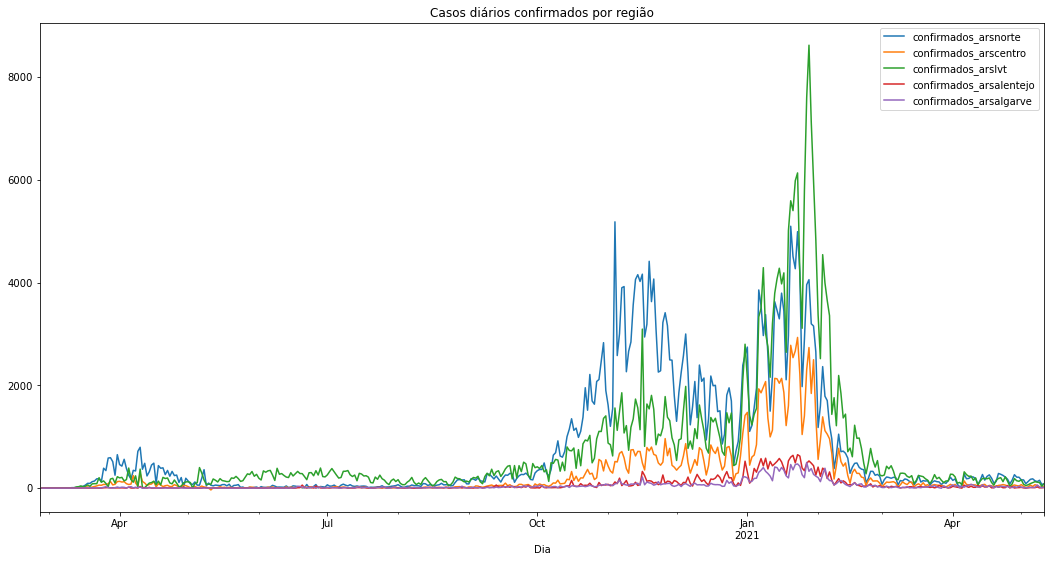

In [131]:
df_covid_daily['Ano'] = df_covid.index.year
ax = df_covid_daily[confirmed_by_region_columns[:-1]].plot(title = 'Casos diários confirmados por região', figsize=(6*3, 3*3));

In [132]:
df_covid_daily[confirmed_by_region_columns]

confirmados_arsnorte  confirmados_arscentro  confirmados_arslvt  \
Dia                                                                           
2020-02-26                   NaN                    NaN                 NaN   
2020-02-27                   0.0                    0.0                 0.0   
2020-02-28                   0.0                    0.0                 0.0   
2020-02-29                   0.0                    0.0                 0.0   
2020-03-01                   0.0                    0.0                 0.0   
...                          ...                    ...                 ...   
2021-05-07                 143.0                   67.0               125.0   
2021-05-08                 127.0                   49.0               115.0   
2021-05-09                 153.0                   21.0               107.0   
2021-05-10                  70.0                   16.0                34.0   
2021-05-11                  88.0                   27.0                84.0   

            confirmados_arsalentejo  confirmados_arsalgarve   Ano  
Dia                                                                
2020-02-26                      NaN                     NaN  2020  
2020-02-27                      0.0                     0.0  2020  
2020-02-28                      0.0                     0.0  2020  
2020-02-29                      0.0                     0.0  2020  
2020-03-01                      0.0                     0.0  2020  
...                             ...                     ...   ...  
2021-05-07                      9.0                    16.0  2021  
2021-05-08                     23.0                    61.0  2021  
2021-05-09                      4.0                    21.0  2021  
2021-05-10                      9.0                     8.0  2021  
2021-05-11                     12.0                    15.0  2021  

[441 rows x 6 columns]

<AxesSubplot:title={'center':'Casos confirmados por região'}, xlabel='Ano'>

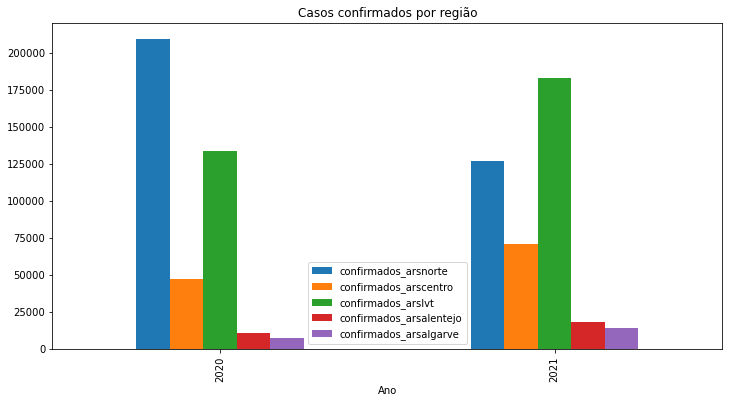

In [133]:
df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().plot(kind='bar', title = 'Casos confirmados por região',  figsize=(6*2, 3*2))

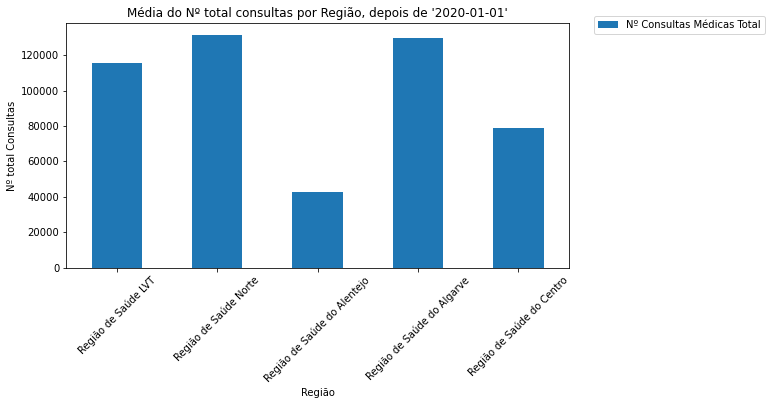

In [134]:
xlabels = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().index
ax = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().plot(kind='bar', figsize=(6*1.5,3*1.5));
ax.set_xticklabels(xlabels, rotation=45);
ax.legend(bbox_to_anchor=(1.4, 1.05))
ax.set_ylabel('Nº total Consultas');
ax.set_title("Média do Nº total consultas por Região, depois de '{}'".format(covid_start_date));

In [135]:
numer = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2020]['confirmados_arsalgarve']
denom = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2020]['confirmados_arsnorte']
numer, denom, 100*numer/denom

(7698.0, 209964.0, 3.666342801623135)

In [136]:
numer = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2021]['confirmados_arsalgarve']
denom = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2021]['confirmados_arsnorte']
numer, denom, 100*numer/denom

(14165.0, 127577.0, 11.103098520893264)

Possível Conclusão:
* "A região de saúde do Algarve (1 instituição) faz tantas consultas médicas hospitalares como a região do Norte (18 instit.) e:
   * em 2020, tem 3.66 % dos casos confirmados da Região Norte"
   * em 2021, tem 10.99 % dos casos confirmados da Região Norte"
   
  -MAS talvez tenham juntado todos os centros de saude e hospitais do algrave numa só instiuição...

In [137]:
#topBestAppointments.query("Ano > 2019 and Região in ('Região de Saúde Norte', 'Região de Saúde do Algarve')")

In [138]:
#topBestAppointments.dtypes

In [139]:
#topBestAppointments = topBestAppointments.astype({'Nº Consultas Médicas Total' : float})

In [140]:
# aqui estão apenas os dados das instituições que mais consultas fazem, de cada região (n são os dados totais )
#ax = topBestAppointments.query("Ano > 2019 and Região in ('Região de Saúde Norte', 'Região de Saúde do Algarve')").groupby(['Ano', 'Região']).mean().plot(kind='bar')